
# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 16 - 4to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 21 de octubre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLSc8dLsaaKQxAbtTv5RejE6TxifO_BugdeEU_IdhKl39qMvoMg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Analizar y preparar el dataset.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- c)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- d) Para el modelo del punto c) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.

Para el punto e) vamos a considerar un problema de regresion, donde la salida es cuanto gasto el cliente:
- e)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- f) Para el mejor modelo obtenido en el apartado e) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos.



### a) Analizar y preparar el dataset:

In [ ]:
# Instala los modulos necesarios
!pip install pandas
!pip install numpy
!pip install seaborn
!pip3 install torch torchvision torchaudio

In [ ]:
# Importa las librerias necesarias
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

import tensorflow as tf

El archivo de datos se puede importar desde Drive.

In [ ]:
# Monta Google Drive
drive.mount('/content/drive/')

# Define la ruta al archivo de datos
ruta_datos = '/content/drive/MyDrive/Colab Notebooks/Posgrado/AP/dataset_black_sales.csv'

# Carga del DataFrame con los registros
df = pd.read_csv(ruta_datos)

Mounted at /content/drive/


También se puede importar el archivo desde un repositorio público de GitHub:

In [ ]:
# Carga el archivo desde un repositorio público de GitHub
url = 'https://raw.githubusercontent.com/fabriciolopretto/Aprendizaje_Profundo/refs/heads/main/TP1/dataset_black_sales.csv'
df = pd.read_csv(url)

In [ ]:
# Visualiza informacion del conjunto de datos
df.info()

# Visualiza los primeros registros
df.head()

# Visualiza estadisticos para cada atributo numerico
df.describe()

# Visualiza valores unicos por columna
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores unicos en la columna '{column}':")
    print(unique_values)
    print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
Valores unicos

Observaciones:

Se dispone de 550068 registros.

Se tienen 11 atributos, que dado el enunciado del problema serán las características. Siete de ellas son numéricas, mientras que 4 son categóricas (en algunos casos ordinales).

La relación entre cantidad de registros y de características es apropiada (nº regisros >> nº de características).

A partir de lo anterior, las variables de entrada (características) del problema son:

| Columna                         | Descripción                            | Valores Únicos Ejemplo                          |
|----------------------------------|----------------------------------------|------------------------------------------------|
| `User_ID`                        | Identificador de usuario               | 1000001, 1000002, 1000003, ..., 1004113        |
| `Product_ID`                     | Identificador de producto              | P00069042, P00248942, P00087842, ..., P00370853 |
| `Gender`                         | Género del usuario                     | 'F', 'M'                                       |
| `Age`                            | Grupo de edad del usuario              | '0-17', '18-25', '26-35', '36-45', '46-55', '55+'           |
| `Occupation`                     | Ocupación del usuario                  | 0, 1, 2, ..., 20                               |
| `City_Category`                  | Categoría de la ciudad                 | 'A', 'B', 'C'                                  |
| `Stay_In_Current_City_Years`     | Años en la ciudad actual               | '0', '1', '2', '3', '4+'                       |
| `Marital_Status`                 | Estado civil del usuario               | 0 (no casado), 1 (casado)                      |
| `Product_Category_1`             | Categoría del producto 1               | 1, 2, 3, ..., 20                               |
| `Product_Category_2`             | Categoría del producto 2               | NaN, 2, 3, ..., 18                             |
| `Product_Category_3`             | Categoría del producto 3               | NaN, 3, 4, ..., 18                             |
|


Por otro lado, la variable de salida (objetivo) del problema es:

| Columna                         | Descripción                            | Valores Únicos Ejemplo                          |
|----------------------------------|----------------------------------------|------------------------------------------------|
                                   |
| `Purchase`                            | Monto de la compra              | '0-5000', '5001-10000', '10001-15000', '15001+'           |

Identificando que se trata de un problema de clasificación múltiple.

Contiuando la exploración de los datos:

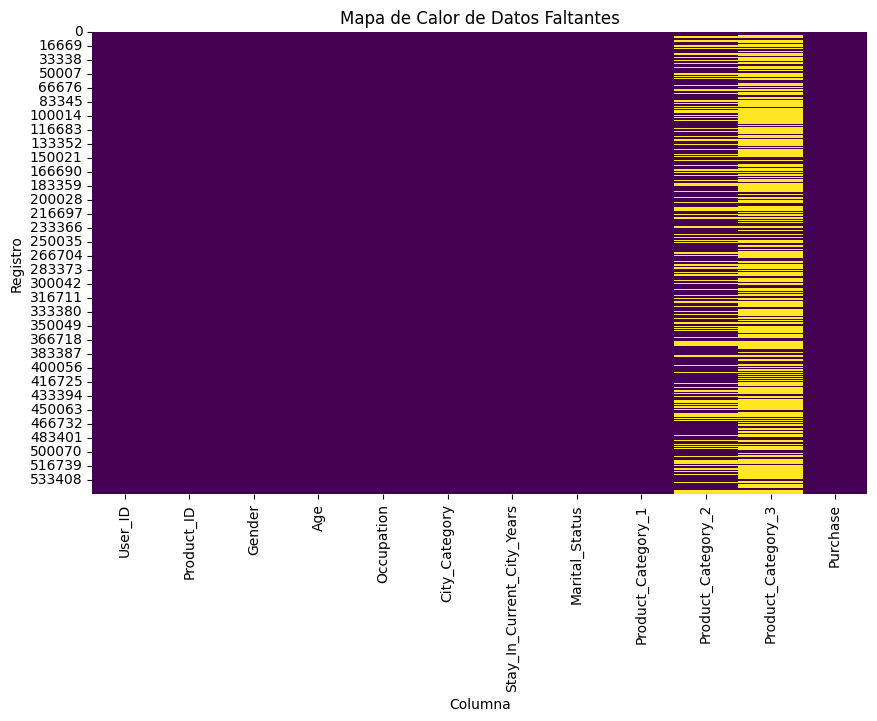

El DataFrame no tiene registros duplicados.
¿Existe alguna celda con solo el carácter '-': False
El porcentaje de valores faltantes en 'Product_Category_2' es: 31.57%
El porcentaje de valores faltantes en 'Product_Category_3' es: 69.67%


In [ ]:
# Verifica si hay registros duplicados en todo el DataFrame
def duplicados(df):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados, y devuelve por mensaje.

  :param:
  :df: DataFrame con los atributos.
  """
  hay_duplicados = df.duplicated().any()

  if hay_duplicados:
      print("El DataFrame tiene registros duplicados.")
  else:
      print("El DataFrame no tiene registros duplicados.")

# Realiza el mapa de calor de datos faltantes
def mapa_calor_faltantaes(df):
  """
  Genera el mapa de calor para visualizar
  donde se alojan los datos faltantes.

  :param:
  :df: DataFrame con los atributos.
  """
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Mapa de Calor de Datos Faltantes')
  plt.xlabel('Columna')
  plt.ylabel('Registro')
  plt.show()

mapa_calor_faltantaes(df)
duplicados(df)

# Verifica si hay algun dato que haya sido completado con '-' a modo de faltante
hay_guion = (df == '-').any().any()

print(f"¿Existe alguna celda con solo el carácter '-': {hay_guion}")

# Busca el rango. Se identifica si hay valores numericos especiales para faltantes
rango = df.describe().loc[['min', 'max']]
rango.loc['range'] = rango.loc['max'] - rango.loc['min']
rango.head()

# Calcula el porcentaje de faltantes de las caracteristicas de interes
columnas = ['Product_Category_2', 'Product_Category_3']

for columna in columnas:

  porcentaje_faltantes = df[columna].isna().mean() * 100
  print(f"El porcentaje de valores faltantes en '{columna}' es: {porcentaje_faltantes:.2f}%")

Se decide trabajar con un primer dataset (df2) reducido a modo de prueba en el que se descarta la característica 'Product_Category_3', y luego los regitros donde 'Product_Category_2' muestra faltantes. Posteriormente, se continua con la ingeniería de características.

También se trabaja con un segundo dataset (df3) al que se le aplica la misma lógica, pero con objetivo numérico ya que será usado en el problema de regresión del inciso e).

In [ ]:
# Copia el original en uno sobre el cual trabajar
df2 = df.copy()
df3 = df.copy()

# Elimina 'Product_Category_3', y luego los resgitros donde 'Product_Category_2' tiene faltantes
df2 = df.drop(columns=['Product_Category_3'])
df2 = df2.dropna(subset=['Product_Category_2'])

df3 = df.drop(columns=['Product_Category_3'])
df3 = df3.dropna(subset=['Product_Category_2'])

# Define los limites de los bins y las etiquetas
bins = [-1, 5000, 10000, 15000, float('inf')]
labels = ['0-5000', '5001-10000', '10001-15000', '15001+']

# Crea la nueva columna 'Purchase_Category' con las etiquetas correspondientes
df2['Purchase_Category'] = pd.cut(df2['Purchase'], bins=bins, labels=labels)

# Unifica el tipo de dato para categorias de productos
df2['Product_Category_2'] = df2['Product_Category_2'].astype('int64')
df3['Product_Category_2'] = df3['Product_Category_2'].astype('int64')

# Define el orden deseado para cada columna categorica
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
stay_order = ['0', '1', '2', '3', '4+']
purchase_order = ['0-5000', '5001-10000', '10001-15000', '15001+']

# Convierte las columnas categoricas en numericas aplicando el orden deseado si aplica, para continuar con la unificacion de datos
df2['Product_ID'] = pd.factorize(df2['Product_ID'])[0]
df2['Gender'] = pd.Categorical(df2['Gender'], categories=['F', 'M']).codes
df2['Age'] = pd.Categorical(df2['Age'], categories=age_order, ordered=True).codes
df2['City_Category'] = pd.Categorical(df2['City_Category'], categories=['A', 'B', 'C'], ordered=True).codes
df2['Stay_In_Current_City_Years'] = pd.Categorical(df2['Stay_In_Current_City_Years'], categories=stay_order, ordered=True).codes
df2['Purchase_Category'] = pd.Categorical(df2['Purchase_Category'], categories=purchase_order, ordered=True).codes

df3['Product_ID'] = pd.factorize(df3['Product_ID'])[0]
df3['Gender'] = pd.Categorical(df3['Gender'], categories=['F', 'M']).codes
df3['Age'] = pd.Categorical(df3['Age'], categories=age_order, ordered=True).codes
df3['City_Category'] = pd.Categorical(df3['City_Category'], categories=['A', 'B', 'C'], ordered=True).codes
df3['Stay_In_Current_City_Years'] = pd.Categorical(df3['Stay_In_Current_City_Years'], categories=stay_order, ordered=True).codes

# Elimina la columna 'Purchase'
df2 = df2.drop('Purchase', axis=1)

# Visualiza el resultado
df2.info()
print('*'*55)
df3.info()

# Solo describe las transformaciones, no se usa este diccionario en particular
features = {
    'Gender': {0: 'F', 1: 'M'},
    'Age': {'0-17': 0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6},
    'City_Category': {'A':0, 'B':1, 'C':2},
    'Stay_In_Current_City_Years': {'0':0, '1':1, '2':2, '3':3, '4+':4},
    'Marital_Status': {0:0, 1:1},
    'Purchase_Category': {'0-5000':0, '5001-10000':1, '10001-15000':2, '15001+':3}
}

# Visualiza valores unicos por columna
print("DataFrame: df2")
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Valores unicos en la columna '{column}':")
    print(unique_values)
    print(f'Cantidad de elementos únicos: {len(unique_values)}')
    print("\n")

print('*'*55)

print("DataFrame: df3")
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f"Valores unicos en la columna '{column}':")
    print(unique_values)
    print(f'Cantidad de elementos únicos: {len(unique_values)}')
    print("\n")


<class 'pandas.core.frame.DataFrame'>
Index: 376430 entries, 1 to 545914
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     376430 non-null  int64
 1   Product_ID                  376430 non-null  int64
 2   Gender                      376430 non-null  int8 
 3   Age                         376430 non-null  int8 
 4   Occupation                  376430 non-null  int64
 5   City_Category               376430 non-null  int8 
 6   Stay_In_Current_City_Years  376430 non-null  int8 
 7   Marital_Status              376430 non-null  int64
 8   Product_Category_1          376430 non-null  int64
 9   Product_Category_2          376430 non-null  int64
 10  Purchase_Category           376430 non-null  int8 
dtypes: int64(6), int8(5)
memory usage: 21.9 MB
*******************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 376430 entries, 1

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


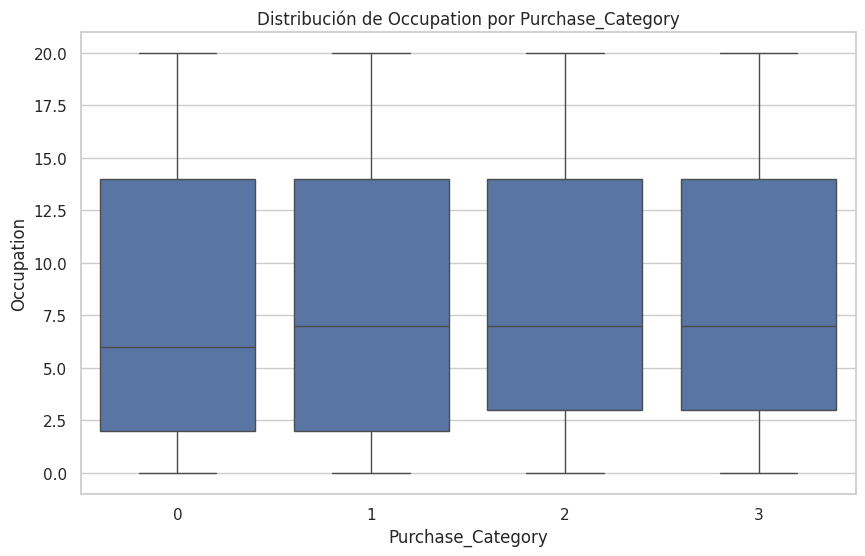

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

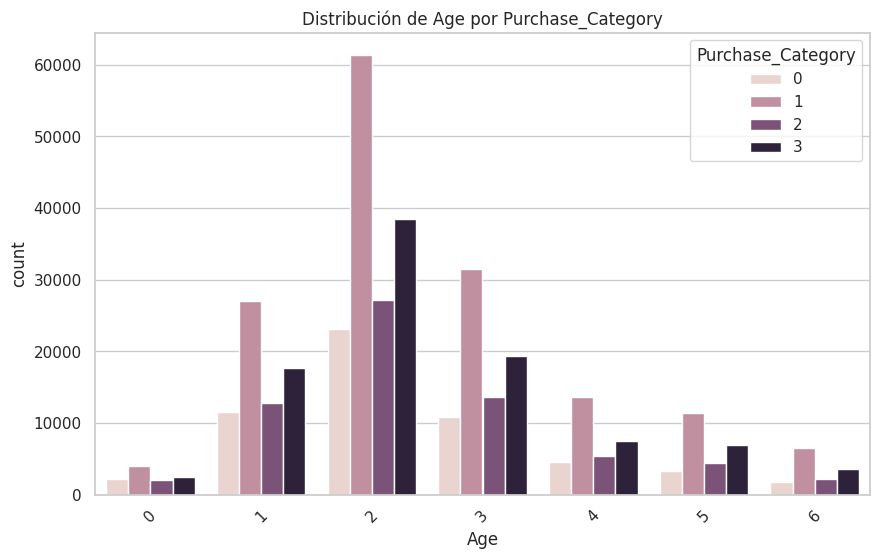

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

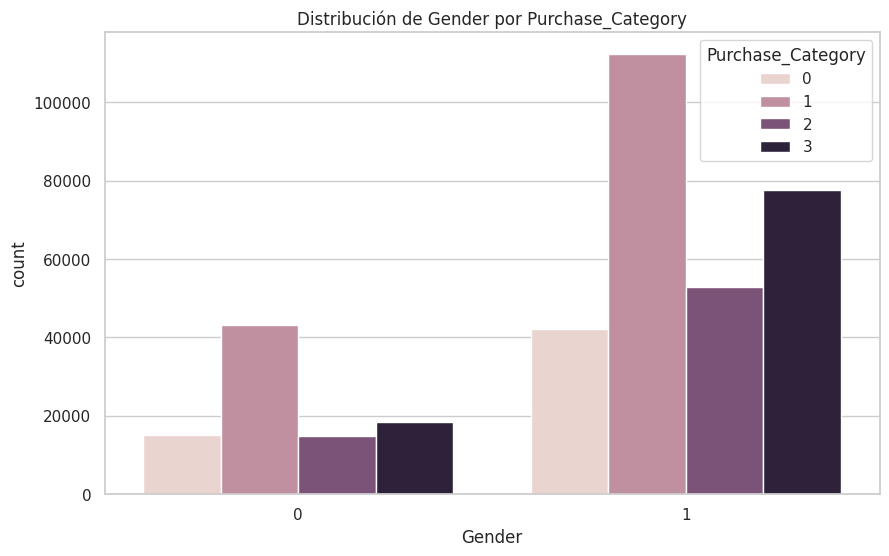

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


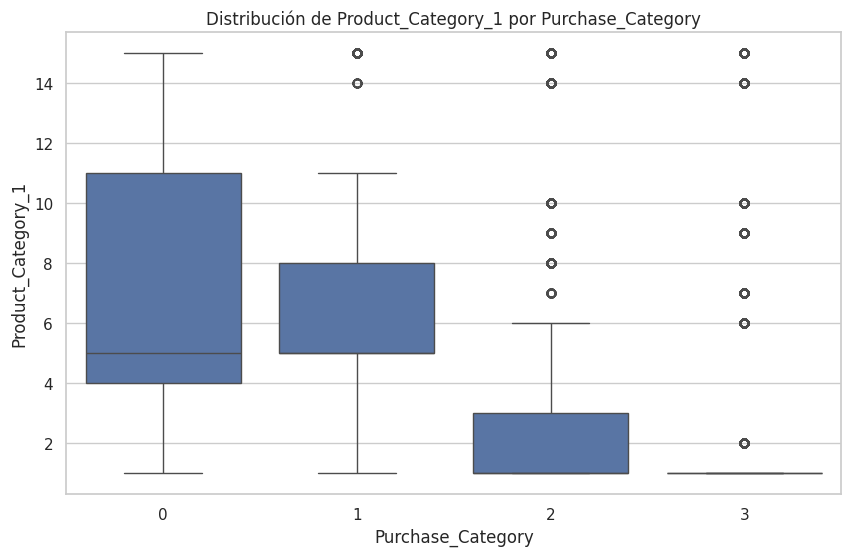

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


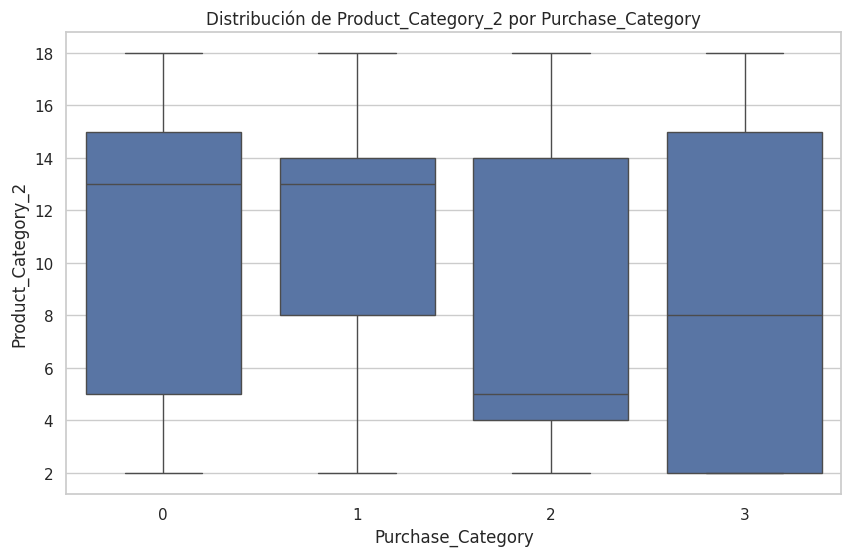

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

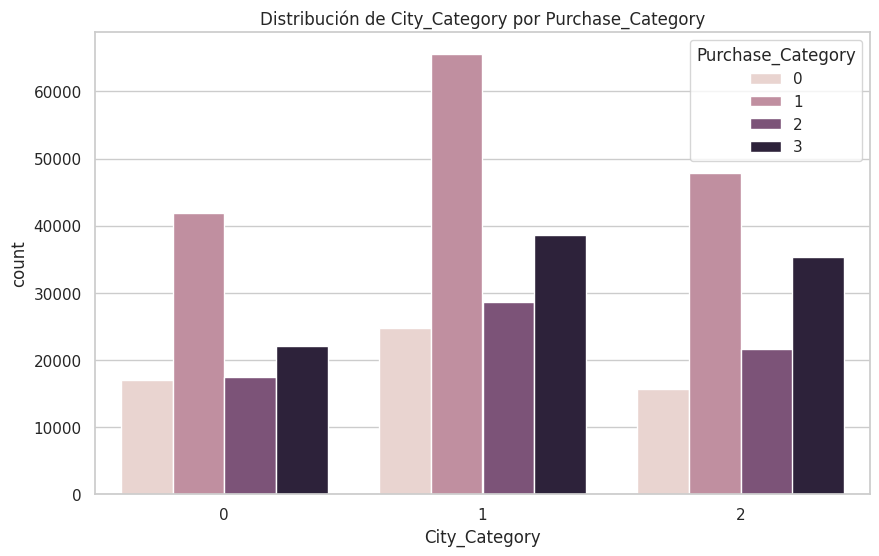

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

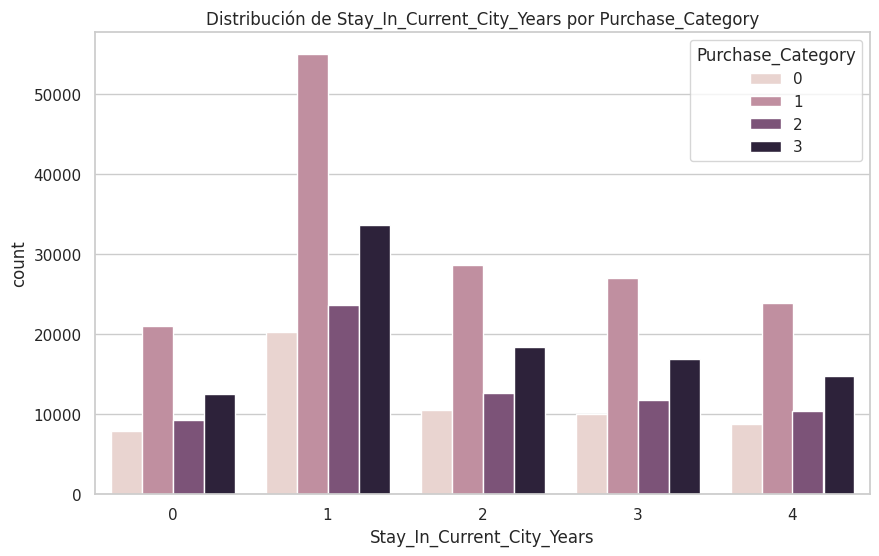

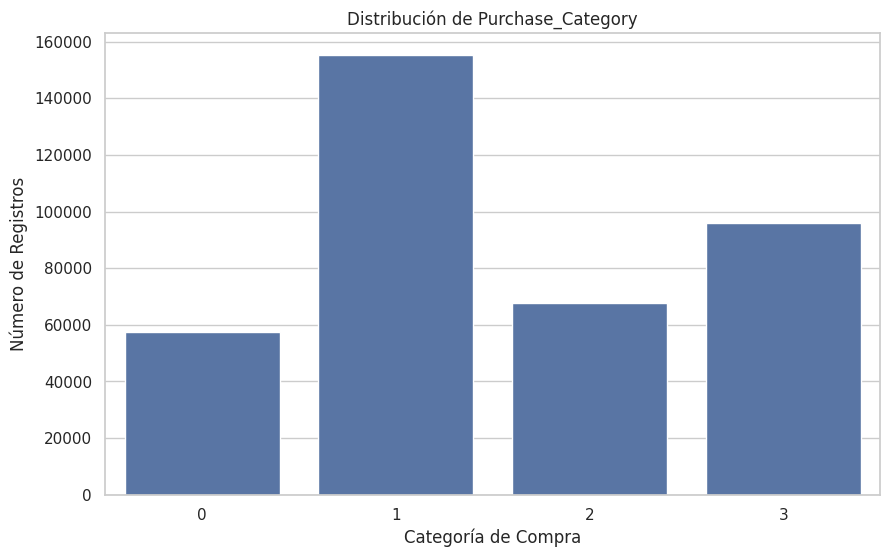

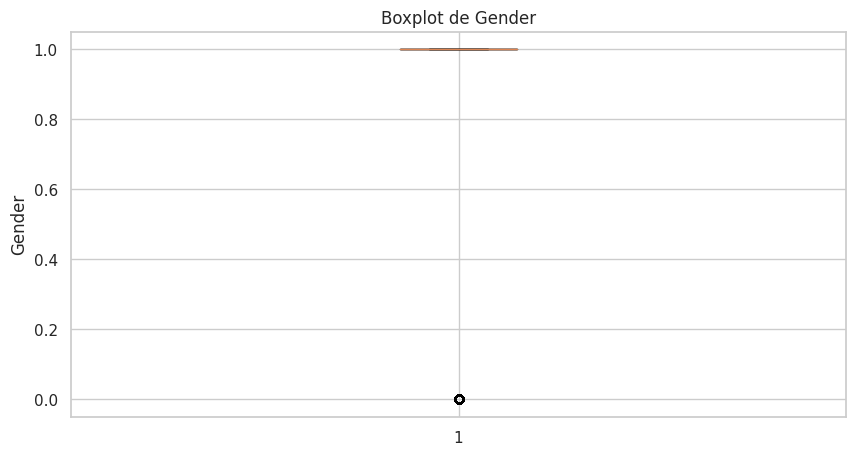

Porcentaje de outliers en Gender: 0.00%


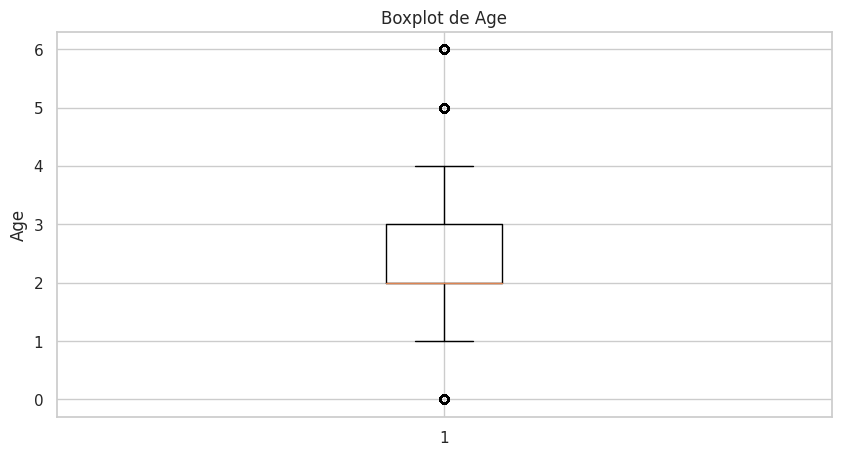

Porcentaje de outliers en Age: 0.00%


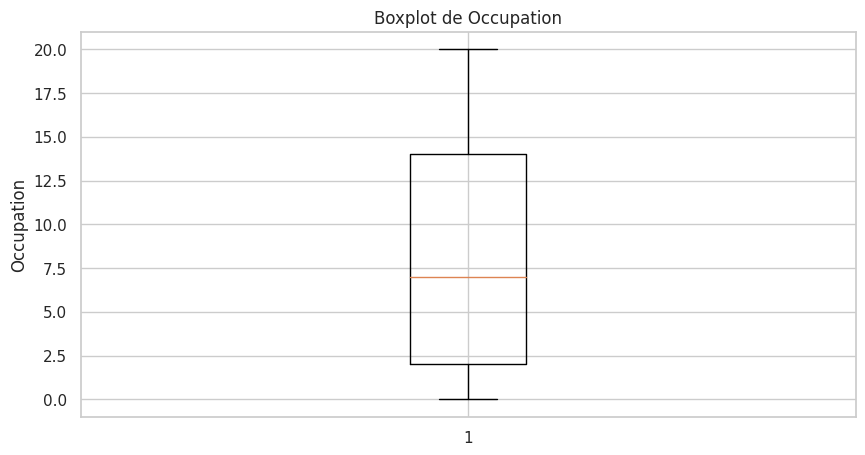

Porcentaje de outliers en Occupation: 0.00%


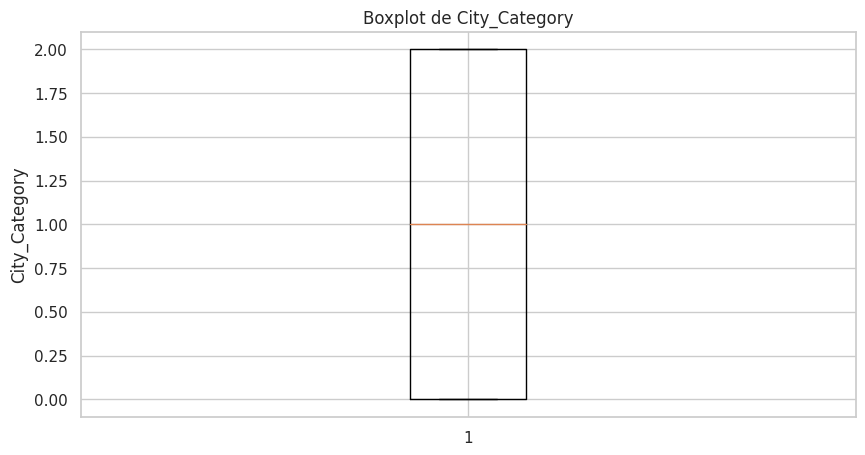

Porcentaje de outliers en City_Category: 0.00%


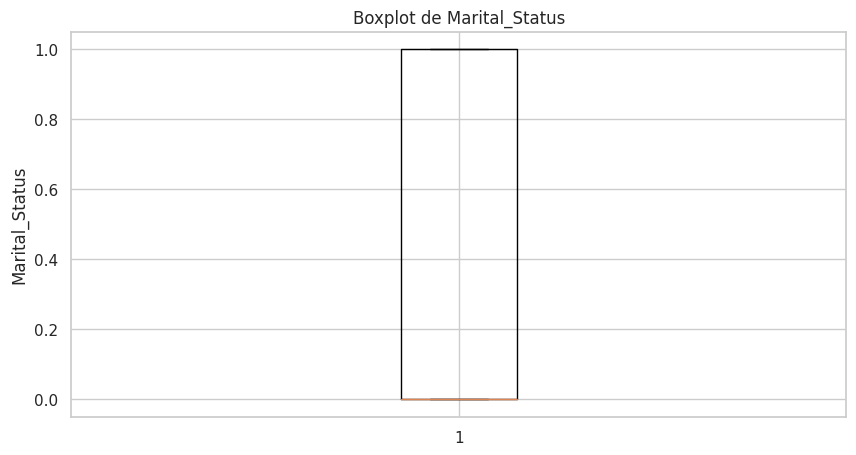

Porcentaje de outliers en Marital_Status: 0.00%


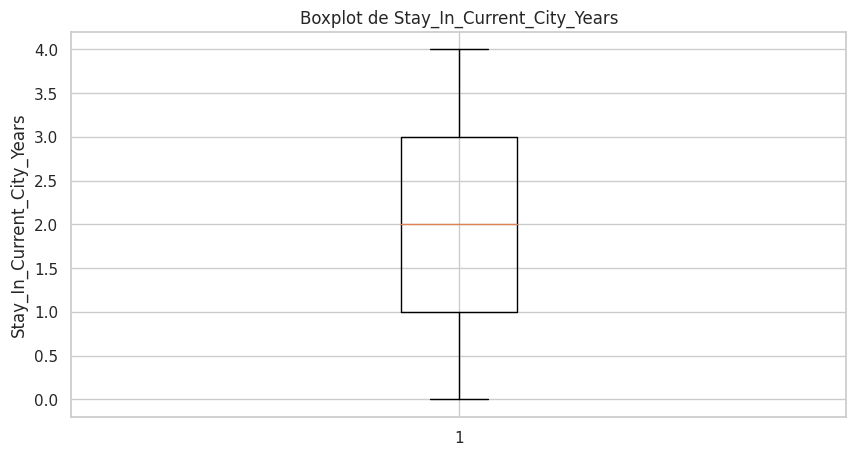

Porcentaje de outliers en Stay_In_Current_City_Years: 0.00%


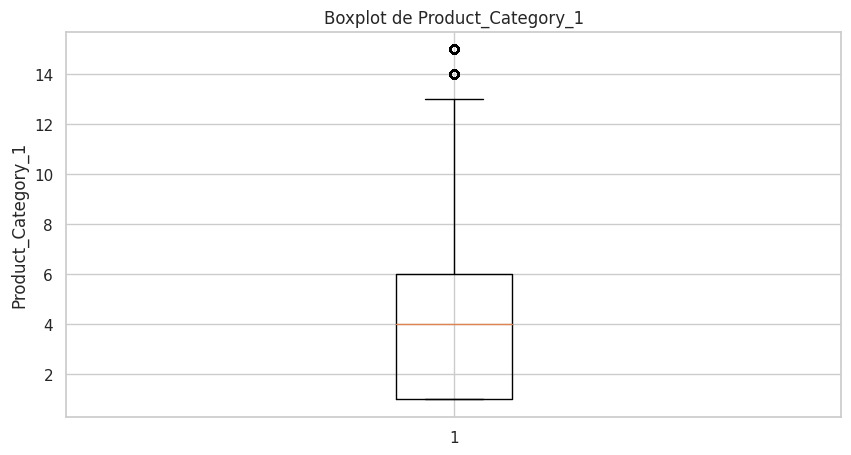

Porcentaje de outliers en Product_Category_1: 0.92%


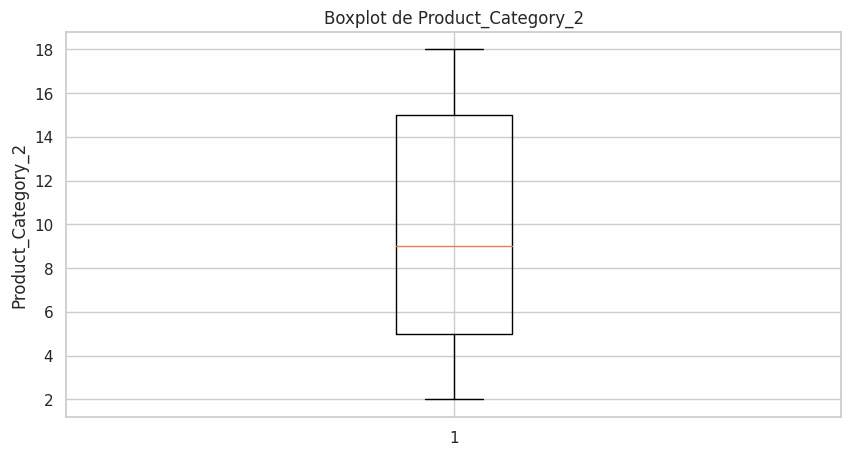

Porcentaje de outliers en Product_Category_2: 0.00%


In [ ]:
# Configura el estilo de los graficos
sns.set(style='whitegrid')

# Grafica la distribucion de 'Occupation' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Category', y='Occupation', data=df2)
plt.title('Distribución de Occupation por Purchase_Category')
plt.show()

# Grafica la distribucion de 'Age' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Purchase_Category', data=df2)
plt.title('Distribución de Age por Purchase_Category')
plt.xticks(rotation=45)
plt.show()

# Graficar la distribución de 'Gender' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Purchase_Category', data=df2)
plt.title('Distribución de Gender por Purchase_Category')
plt.show()

# Grafica la distribucion de 'Product_Category_1' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Category', y='Product_Category_1', data=df2)
plt.title('Distribución de Product_Category_1 por Purchase_Category')
plt.show()

# Grafica la distribucion de 'Product_Category_2' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Category', y='Product_Category_2', data=df2)
plt.title('Distribución de Product_Category_2 por Purchase_Category')
plt.show()

# Grafica la distribucion de 'City_Category' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='City_Category', hue='Purchase_Category', data=df2)
plt.title('Distribución de City_Category por Purchase_Category')
plt.show()

# Grafica la distribucion de 'Stay_In_Current_City_Years' por 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Stay_In_Current_City_Years', hue='Purchase_Category', data=df2)
plt.title('Distribución de Stay_In_Current_City_Years por Purchase_Category')
plt.show()

# Grafica la distribucion de las categorias de 'Purchase_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchase_Category', data=df2)
plt.title('Distribución de Purchase_Category')
plt.xlabel('Categoría de Compra')
plt.ylabel('Número de Registros')
plt.show()

# Lista de columnas numericas
numeric_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']

# Crea boxplots y calcula outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df2[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

    # Calcula el porcentaje de outliers
    mean = df2[col].mean()
    std = df2[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Cuenta outliers
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    outlier_percentage = len(outliers) / len(df2) * 100

    print(f'Porcentaje de outliers en {col}: {outlier_percentage:.2f}%')


In [ ]:
# Cuenta el numero de ejemplos por clase en df2['Purchase_Category']
min_count = df2['Purchase_Category'].value_counts().min()
# Aplica submuestreo a cada clase para igualar al tamano de la clase minoritaria
df2 = df2.groupby('Purchase_Category').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
# Verifica la distribucion de clases despues del submuestreo
print(df2['Purchase_Category'].value_counts())

# Visualiza el resultado
df2.info()

Purchase_Category
0    57360
1    57360
2    57360
3    57360
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229440 entries, 0 to 229439
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     229440 non-null  int64
 1   Product_ID                  229440 non-null  int64
 2   Gender                      229440 non-null  int8 
 3   Age                         229440 non-null  int8 
 4   Occupation                  229440 non-null  int64
 5   City_Category               229440 non-null  int8 
 6   Stay_In_Current_City_Years  229440 non-null  int8 
 7   Marital_Status              229440 non-null  int64
 8   Product_Category_1          229440 non-null  int64
 9   Product_Category_2          229440 non-null  int64
 10  Purchase_Category           229440 non-null  int8 
dtypes: int64(6), int8(5)
memory usage: 11.6 MB


<ipython-input-7-41720e0094ed>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df2.groupby('Purchase_Category').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


Observaciones:

Se observó que la distribución de compras por ocupación es homogéneo. Mientras que el rango etario de 26-35 años es el que más compras realiza. Lo mismo sucede con el género, donde los hombres son los que más gastan. Además, en las ciudades de categoría 'B' es donde más gastos por compra se acusan. Como también las personas que se encuentran hace un año en la misma locación. Cabe destacar, que para todos estos casos, el rango de compra más frecuente es el de 5001-10000, seguido de 15000+.

Por otro lado, mientras las categorías de productos 2 mantienen distribuciones similares para todos los rangos de gastos, en las categorías de productos 1 resulta muy poco frecuente para rangos de gastos elevados.

También, se vio que las categorías del objetivo no se encuentran balanceadas. Debido a esto, hubo que aplicar una técnica de balanceo para que este no impacte en las predicciones.

Por último, se evaluó que las características que posen "outliers" no poseen una cantidad significativa.

###b) Entrenar un modelo de deep learning que no utilice embeddings

Epoch [10/600], Loss: 1.1870, Val Loss: 1.1812
Epoch [20/600], Loss: 1.1322, Val Loss: 1.1272
Epoch [30/600], Loss: 1.1041, Val Loss: 1.1005
Epoch [40/600], Loss: 1.0818, Val Loss: 1.0756
Epoch [50/600], Loss: 1.0576, Val Loss: 1.0530
Epoch [60/600], Loss: 1.0312, Val Loss: 1.0246
Epoch [70/600], Loss: 1.0022, Val Loss: 0.9967
Epoch [80/600], Loss: 0.9820, Val Loss: 0.9774
Epoch [90/600], Loss: 0.9620, Val Loss: 0.9609
Epoch [100/600], Loss: 0.9411, Val Loss: 0.9396
Epoch [110/600], Loss: 0.9280, Val Loss: 0.9256
Epoch [120/600], Loss: 0.9206, Val Loss: 0.9156
Epoch [130/600], Loss: 0.9301, Val Loss: 0.9182
Epoch [140/600], Loss: 0.9231, Val Loss: 0.9080
Epoch [150/600], Loss: 0.9344, Val Loss: 0.9024
Epoch [160/600], Loss: 0.9065, Val Loss: 0.9085
Epoch [170/600], Loss: 0.9047, Val Loss: 0.8966
Epoch [180/600], Loss: 0.8979, Val Loss: 0.8961
Epoch [190/600], Loss: 0.8949, Val Loss: 0.8927
Epoch [200/600], Loss: 0.8929, Val Loss: 0.8908
Epoch [210/600], Loss: 0.8911, Val Loss: 0.8892
E

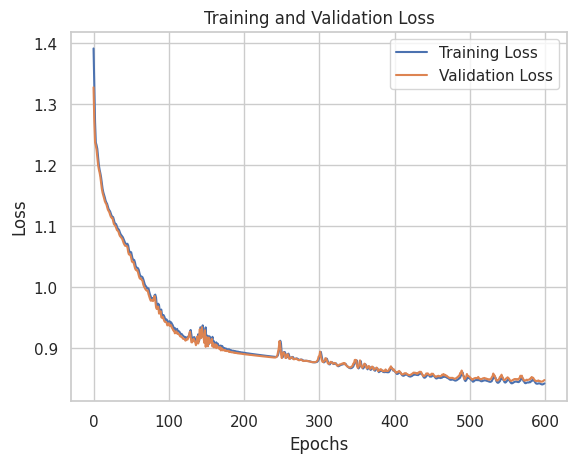

Accuracy: 0.6258


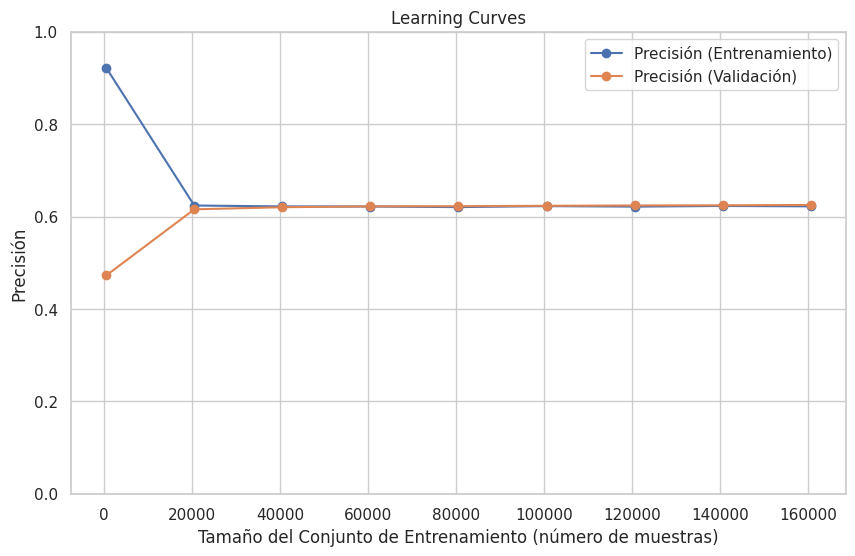

In [ ]:
# Separa caracterisitcas de objetivo
X = df2.drop(columns=['Purchase_Category', 'Product_ID', 'User_ID'])
y = df2['Purchase_Category']

# Divide en conjuntos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado, se usa StandarScaler en este caso
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convierte los datos a tensores para usarlos en PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val.values)

# Crea la Red Neuronal como una clase
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Capa de entrada a la primera capa oculta
        self.fc1 = nn.Linear(X_train.shape[1], 128)  # 128 neuronas en la primera capa oculta
        # Primera capa oculta a segunda capa oculta
        self.fc2 = nn.Linear(128, 64)  # 64 neuronas en la segunda capa oculta
        # Segunda capa oculta a capa de salida
        self.fc3 = nn.Linear(64, 4)  # 4 clases de salida (grupo de gasto)

    def forward(self, x):
        # Pasada hacia adelante
        x = F.relu(self.fc1(x))  # Activacion ReLU en la primera capa oculta
        x = F.relu(self.fc2(x))  # Activacion ReLU en la segunda capa oculta
        x = self.fc3(x)          # Salida sin activacion: Funcion de perdida 'CrossEntropyLoss' de PyTorch incluye automaticamente la operacion softmax sobre la salida del modelo
        return x

# Inicializa el modelo
model = SimpleNN()

# Define el hiperparametro de la tasa de aprendizaje
lr = 0.01

# Usa la funcion de perdida de Cross Entropy y un optimizador Adam
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Entrena el modelo y guarda el valor de la funcion de costo y la metrica de validacion en cada epoca
num_epochs = 600
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()

    # Entrenamiento
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validacion
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Grafica la evolucion de la funcion de costo durante el entrenamiento y la validacion
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evalua el rendimiento en el conjunto de validacion
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    _, predicted = torch.max(val_outputs, 1)
    accuracy = (predicted == y_val_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')

# Cantidad de datos que se utilizaran para los tamanos del conjunto de entrenamiento
train_sizes = [int(x) for x in np.linspace(500, len(X_train) - 1, 9)]

train_accuracies = []
val_accuracies = []

# Calcula la precision para diferentes tamanos del conjunto de entrenamiento
for size in train_sizes:
    # Divide el conjunto de datos con el tamano especificado
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    # Convierte los datos a tensores
    X_train_tensor = torch.FloatTensor(X_train_subset)
    y_train_tensor = torch.LongTensor(y_train_subset.values)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Entrena el modelo
    model.train()
    for epoch in range(50):
        optimizer.zero_grad()  # Limpia gradientes
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Calcula perdida
        loss.backward()  # Backward pass
        optimizer.step()  # Actualiza parametros

    # Evalua el modelo en el conjunto de entrenamiento
    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        _, train_preds = torch.max(train_outputs, 1)
        train_accuracy = (train_preds == y_train_tensor).float().mean().item()
        train_accuracies.append(train_accuracy)

        # Evalua el modelo en el conjunto de validacion
        val_outputs = model(X_val_tensor)
        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = (val_preds == y_val_tensor).float().mean().item()
        val_accuracies.append(val_accuracy)

# Grafica las Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Precisión (Entrenamiento)', marker='o')
plt.plot(train_sizes, val_accuracies, label='Precisión (Validación)', marker='o')
plt.title('Learning Curves')
plt.xlabel('Tamaño del Conjunto de Entrenamiento (número de muestras)')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.show()


Observaciones:

A medida que aumenta el número de épocas el valor de la función de pérdida del conjunto de entrenamiento y de prueba fueron disminuyendo pero asintóticamente a un valor cercano a 0,85. Además no se observó que para valores elevados de época la curva con el conjunto de prueba comience a aumentar nuevamente, lo que indica que se no se encuentra en sobreajuste.

También, la gráfica de curva de aprendizaje muestra la configuración típica de subajuste. Es decir, poca distancia de ordenada entre curvas para valores elevados de época, con ambas curvas convergiendo asintóticamente a un valor determinado de ordeanda pero con la curva del conjunto de entrenamiento lejos de valores próximos a uno.

Por último, se llega a la conclusión que difícilmente agregando regularización en la optimización se pueda mejorar esta situación, dado que esa técnica está reservada para cuando se da sobreajuste (limitando el aprendizaje del modelo) y no el subajuste. En este caso habría que aumentar la complejidad del modelo, aumentando al cantidad de características. Esto se puede intentar agregando capas de embedding.

###c )  Entrenar un modelo de deep learning que utilice 2 capas de embeddings

Se hace un primer experimento sin regularización:

Epoch [10/600], Loss: 1.1681, Val Loss: 1.1586
Epoch [20/600], Loss: 1.0569, Val Loss: 1.0568
Epoch [30/600], Loss: 0.9426, Val Loss: 0.9510
Epoch [40/600], Loss: 0.8300, Val Loss: 0.8535
Epoch [50/600], Loss: 0.7472, Val Loss: 0.7923
Epoch [60/600], Loss: 0.6975, Val Loss: 0.7646
Epoch [70/600], Loss: 0.6761, Val Loss: 0.7583
Epoch [80/600], Loss: 0.6411, Val Loss: 0.7557
Epoch [90/600], Loss: 0.6187, Val Loss: 0.7564
Epoch [100/600], Loss: 0.6006, Val Loss: 0.7652
Epoch [110/600], Loss: 0.5892, Val Loss: 0.7743
Epoch [120/600], Loss: 0.5719, Val Loss: 0.7880
Epoch [130/600], Loss: 0.5566, Val Loss: 0.8003
Epoch [140/600], Loss: 0.5451, Val Loss: 0.8232
Epoch [150/600], Loss: 0.5413, Val Loss: 0.8399
Epoch [160/600], Loss: 0.5166, Val Loss: 0.8515
Epoch [170/600], Loss: 0.5053, Val Loss: 0.8664
Epoch [180/600], Loss: 0.5048, Val Loss: 0.9311
Epoch [190/600], Loss: 0.5169, Val Loss: 0.8945
Epoch [200/600], Loss: 0.4898, Val Loss: 0.9090
Epoch [210/600], Loss: 0.4693, Val Loss: 0.9216
E

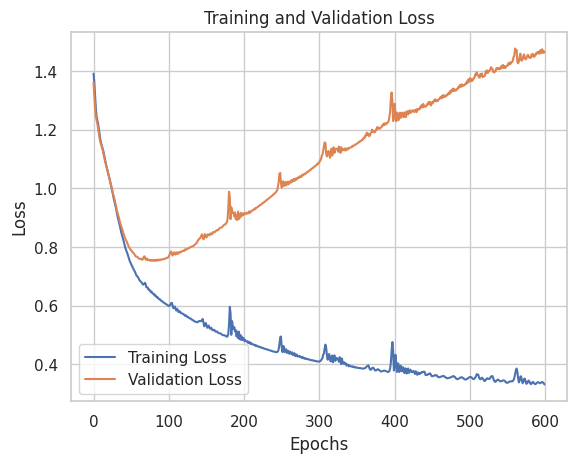

Accuracy: 0.6255


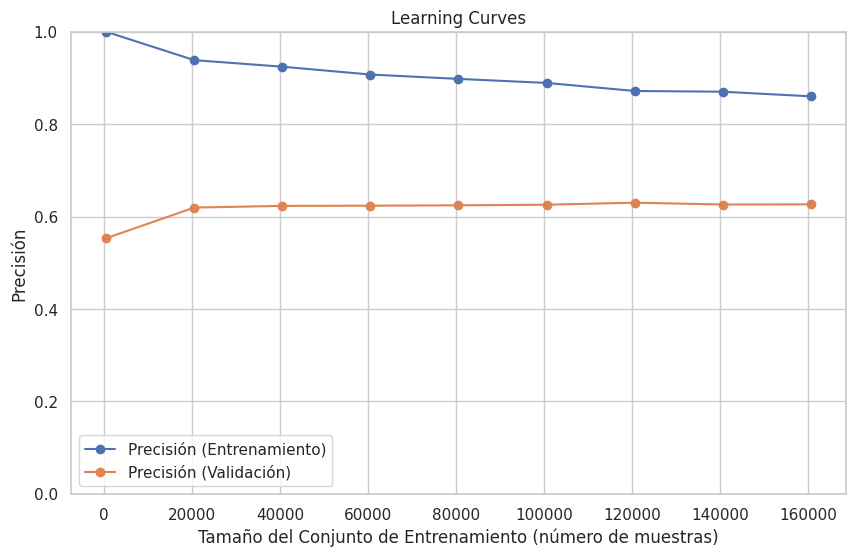

In [ ]:
# Mapea los User_ID y Product_ID a un rango continuo
user_mapping = {user_id: idx for idx, user_id in enumerate(df2['User_ID'].unique())}
product_mapping = {product_id: idx for idx, product_id in enumerate(df2['Product_ID'].unique())}

# Aplica el mapeo a los DataFrames
df2['User_ID_mapped'] = df2['User_ID'].map(user_mapping)
df2['Product_ID_mapped'] = df2['Product_ID'].map(product_mapping)

# Separa caracteristicas y objetivo
X = df2.drop(columns=['Purchase_Category', 'Product_ID', 'User_ID', 'User_ID_mapped', 'Product_ID_mapped'])
y = df2['Purchase_Category']

# Divide en conjuntos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado, se usa StandardScaler en este caso
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convierte los datos a tensores para usarlos en PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val.values)

# Define el tamano de los embeddings (hiperparametro)
embedding_size = 10

# Crea la Red Neuronal como una clase
class SimpleNN(nn.Module):
    def __init__(self, num_users, num_products, embedding_size):
        super(SimpleNN, self).__init__()
        # Capas de embedding
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.product_embedding = nn.Embedding(num_products, embedding_size)

        # Capa de entrada a la primera capa oculta
        self.fc1 = nn.Linear(X_train.shape[1] + 20, 128)  # +20 por los embeddings (10 para usuario y 10 para producto), en 128 Neuronas
        # Primera capa oculta a segunda capa oculta
        self.fc2 = nn.Linear(128, 64)  # 32 neuronas en la segunda capa oculta
        # Segunda capa oculta a capa de salida
        self.fc3 = nn.Linear(64, 4)  # 4 clases de salida (grupo de gasto)

    def forward(self, user_ids, product_ids, x):
        user_embeds = self.user_embedding(user_ids)
        product_embeds = self.product_embedding(product_ids)

        x = torch.cat((x, user_embeds, product_embeds), dim=1)  # Concatena caracteristicas y embeddings
        x = F.relu(self.fc1(x))  # Activacion ReLU en la primera capa oculta
        x = F.relu(self.fc2(x))  # Activacion ReLU en la segunda capa oculta
        x = self.fc3(x)  # Salida sin activacion: Funcion de perdida 'CrossEntropyLoss' de PyTorch incluye automaticamente la operacion softmax sobre la salida del modelo
        return x

# Inicializa el modelo
num_users = len(user_mapping)
num_products = len(product_mapping)
model = SimpleNN(num_users, num_products, embedding_size)

# Define el hiperparametro de la tasa de aprendizaje
lr = 0.01

# Usa la funcion de perdida de Cross Entropy y un optimizador Adam
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Entrena el modelo y guarda el valor de la funcion de costo y la metrica de validacion en cada epoca
num_epochs = 600
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()

    # Obtiene IDs de usuario y producto
    user_ids = torch.LongTensor(df2.loc[y_train.index, 'User_ID_mapped'].values)
    product_ids = torch.LongTensor(df2.loc[y_train.index, 'Product_ID_mapped'].values)

    # Entrenamiento
    optimizer.zero_grad()
    outputs = model(user_ids, product_ids, X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validacion
    model.eval()
    with torch.no_grad():
        val_user_ids = torch.LongTensor(df2.loc[y_val.index, 'User_ID_mapped'].values)
        val_product_ids = torch.LongTensor(df2.loc[y_val.index, 'Product_ID_mapped'].values)
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Grafica la evolucion de la funcion de costo durante el entrenamiento y la validacion
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evalua el rendimiento en el conjunto de validacion
model.eval()
with torch.no_grad():
    val_user_ids = torch.LongTensor(df2.loc[y_val.index, 'User_ID_mapped'].values)
    val_product_ids = torch.LongTensor(df2.loc[y_val.index, 'Product_ID_mapped'].values)
    val_outputs = model(val_user_ids, val_product_ids, X_val_tensor)
    _, predicted = torch.max(val_outputs, 1)
    accuracy = (predicted == y_val_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')

# Cantidad de datos que se utilizaran para los tamanos del conjunto de entrenamiento
train_sizes = [int(x) for x in np.linspace(500, len(X_train) - 1, 9)]

train_accuracies = []
val_accuracies = []

# Calcula la precision para diferentes tamanos del conjunto de entrenamiento
for size in train_sizes:
    # Divide el conjunto de datos con el tamano especificado
    X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=size, random_state=42, stratify=y)

    # Convierte los datos a tensores
    X_train_tensor = torch.FloatTensor(scaler.transform(X_train_subset))
    y_train_tensor = torch.LongTensor(y_train_subset.values)

    # Obtiene los IDs de usuario y producto
    user_ids = torch.LongTensor(df2.loc[y_train_subset.index, 'User_ID_mapped'].values)
    product_ids = torch.LongTensor(df2.loc[y_train_subset.index, 'Product_ID_mapped'].values)

    # Entrena el modelo
    model.train()
    for epoch in range(50):
        optimizer.zero_grad()  # Limpia gradientes
        outputs = model(user_ids, product_ids, X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Calcula perdida
        loss.backward()  # Backward pass
        optimizer.step()  # Actualiza parametros

    # Evalua el modelo en el conjunto de entrenamiento
    model.eval()
    with torch.no_grad():
        train_outputs = model(user_ids, product_ids, X_train_tensor)
        _, train_preds = torch.max(train_outputs, 1)
        train_accuracy = (train_preds == y_train_tensor).float().mean().item()
        train_accuracies.append(train_accuracy)

        # Evalua el modelo en el conjunto de validacion
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor)
        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = (val_preds == y_val_tensor).float().mean().item()
        val_accuracies.append(val_accuracy)

# Grafica las Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Precisión (Entrenamiento)', marker='o')
plt.plot(train_sizes, val_accuracies, label='Precisión (Validación)', marker='o')
plt.title('Learning Curves')
plt.xlabel('Tamaño del Conjunto de Entrenamiento (número de muestras)')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.show()

Alternativa con Regularización L2, dejando los demás hiperparámetros con los mismos valores.

Epoch [10/600], Loss: 1.1955, Val Loss: 1.1867
Epoch [20/600], Loss: 1.1679, Val Loss: 1.1649
Epoch [30/600], Loss: 1.1430, Val Loss: 1.1387
Epoch [40/600], Loss: 1.1155, Val Loss: 1.1118
Epoch [50/600], Loss: 1.1046, Val Loss: 1.1018
Epoch [60/600], Loss: 1.0950, Val Loss: 1.0911
Epoch [70/600], Loss: 1.0864, Val Loss: 1.0830
Epoch [80/600], Loss: 1.0796, Val Loss: 1.0763
Epoch [90/600], Loss: 1.0755, Val Loss: 1.0736
Epoch [100/600], Loss: 1.0721, Val Loss: 1.0696
Epoch [110/600], Loss: 1.0688, Val Loss: 1.0653
Epoch [120/600], Loss: 1.0663, Val Loss: 1.0634
Epoch [130/600], Loss: 1.0618, Val Loss: 1.0590
Epoch [140/600], Loss: 1.0572, Val Loss: 1.0540
Epoch [150/600], Loss: 1.0523, Val Loss: 1.0487
Epoch [160/600], Loss: 1.0481, Val Loss: 1.0436
Epoch [170/600], Loss: 1.0411, Val Loss: 1.0372
Epoch [180/600], Loss: 1.0317, Val Loss: 1.0285
Epoch [190/600], Loss: 1.0223, Val Loss: 1.0194
Epoch [200/600], Loss: 1.0154, Val Loss: 1.0120
Epoch [210/600], Loss: 1.0068, Val Loss: 1.0040
E

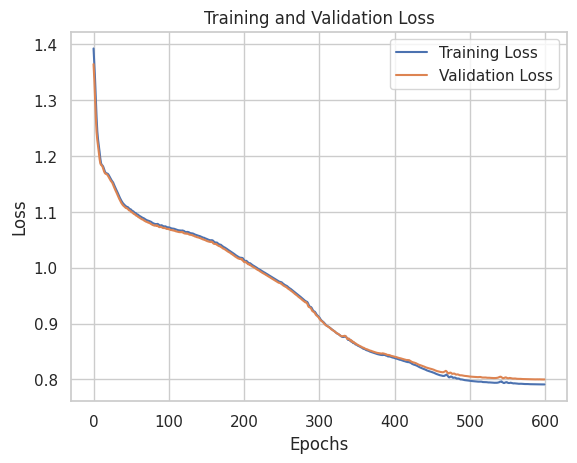

Accuracy: 0.6748


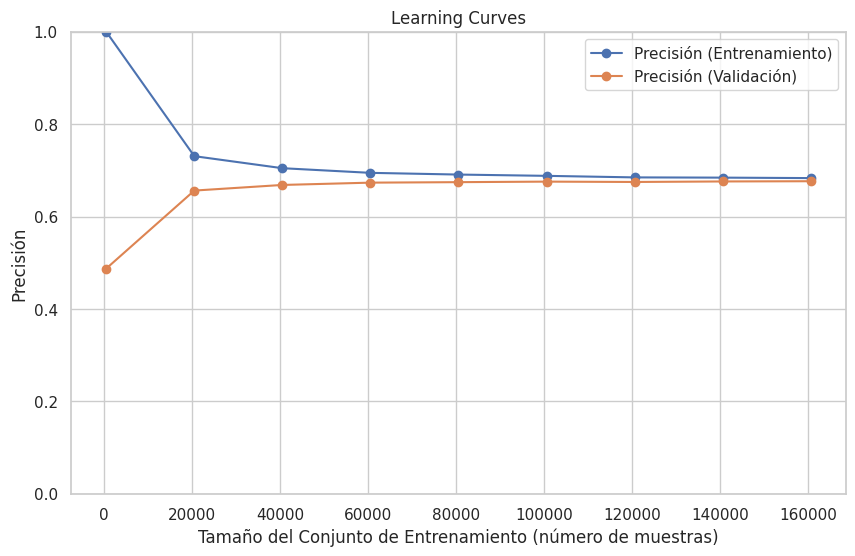

In [ ]:
# Mapea los User_ID y Product_ID a un rango continuo
user_mapping = {user_id: idx for idx, user_id in enumerate(df2['User_ID'].unique())}
product_mapping = {product_id: idx for idx, product_id in enumerate(df2['Product_ID'].unique())}

# Aplica el mapeo a los DataFrames
df2['User_ID_mapped'] = df2['User_ID'].map(user_mapping)
df2['Product_ID_mapped'] = df2['Product_ID'].map(product_mapping)

# Separa caracteristicas y objetivo
X = df2.drop(columns=['Purchase_Category', 'Product_ID', 'User_ID', 'User_ID_mapped', 'Product_ID_mapped'])
y = df2['Purchase_Category']

# Divide en conjuntos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convierte los datos a tensores para usarlos en PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val.values)

# Define el tamano de los embeddings
embedding_size = 10

# Crea la Red Neuronal como una clase
class SimpleNN(nn.Module):
    def __init__(self, num_users, num_products, embedding_size):
        super(SimpleNN, self).__init__()
        # Capas de embedding
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.product_embedding = nn.Embedding(num_products, embedding_size)

        # Capa de entrada a la primera capa oculta
        self.fc1 = nn.Linear(X_train.shape[1] + 20, 128)  # +20 por los embeddings (10 para usuario y 10 para producto), son 128 neuronas para la primera capa
        # Primera capa oculta a segunda capa oculta
        self.fc2 = nn.Linear(128, 64)  # 64 neuronas en la segunda capa oculta
        # Segunda capa oculta a capa de salida
        self.fc3 = nn.Linear(64, 4)  # 4 clases de salida (grupo de gasto)

    def forward(self, user_ids, product_ids, x):
        user_embeds = self.user_embedding(user_ids)
        product_embeds = self.product_embedding(product_ids)

        x = torch.cat((x, user_embeds, product_embeds), dim=1)  # Concatena caracteristicas y embeddings
        x = F.relu(self.fc1(x))  # Activacion ReLU en la primera capa oculta
        x = F.relu(self.fc2(x))  # Activacion ReLU en la segunda capa oculta
        x = self.fc3(x)  # Salida sin activacion: la metrica CrossEntropy aplica Softmax automaticamente
        return x

# Inicializa el modelo
num_users = len(user_mapping)
num_products = len(product_mapping)
model = SimpleNN(num_users, num_products, embedding_size)

# Usa la funcion de perdida de Cross Entropy y un optimizador Adam con regularizacion L2
weight_decay =  0.01 # hiperparametro de la regularizacion sobre el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)

# Entrena el modelo y guarda el valor de la funcion de costo y la metrica de validacion en cada epoca
num_epochs = 600
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()

    # Obtiene IDs de usuario y producto
    user_ids = torch.LongTensor(df2.loc[y_train.index, 'User_ID_mapped'].values)
    product_ids = torch.LongTensor(df2.loc[y_train.index, 'Product_ID_mapped'].values)

    # Entrenamiento
    optimizer.zero_grad()
    outputs = model(user_ids, product_ids, X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validacion
    model.eval()
    with torch.no_grad():
        val_user_ids = torch.LongTensor(df2.loc[y_val.index, 'User_ID_mapped'].values)
        val_product_ids = torch.LongTensor(df2.loc[y_val.index, 'Product_ID_mapped'].values)
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Grafica la evolucion de la funcion de costo durante el entrenamiento y la validacion
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evalua el rendimiento en el conjunto de validacion
model.eval()
with torch.no_grad():
    val_user_ids = torch.LongTensor(df2.loc[y_val.index, 'User_ID_mapped'].values)
    val_product_ids = torch.LongTensor(df2.loc[y_val.index, 'Product_ID_mapped'].values)
    val_outputs = model(val_user_ids, val_product_ids, X_val_tensor)
    _, predicted = torch.max(val_outputs, 1)
    accuracy = (predicted == y_val_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')

# Cantidad de datos que se utilizaran para los tamanos del conjunto de entrenamiento
train_sizes = [int(x) for x in np.linspace(500, len(X_train) - 1, 9)]

train_accuracies = []
val_accuracies = []

# Calcula la precision para diferentes tamanos del conjunto de entrenamiento
for size in train_sizes:
    # Divide el conjunto de datos con el tamano especificado
    X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=size, random_state=42, stratify=y)

    # Convierte los datos a tensores
    X_train_tensor = torch.FloatTensor(scaler.transform(X_train_subset))
    y_train_tensor = torch.LongTensor(y_train_subset.values)

    # Obtiene los IDs de usuario y producto
    user_ids = torch.LongTensor(df2.loc[y_train_subset.index, 'User_ID_mapped'].values)
    product_ids = torch.LongTensor(df2.loc[y_train_subset.index, 'Product_ID_mapped'].values)

    # Entrena el modelo
    model.train()
    for epoch in range(50):
        optimizer.zero_grad()  # Limpia gradientes
        outputs = model(user_ids, product_ids, X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Calcula perdida
        loss.backward()  # Backward pass
        optimizer.step()  # Actualiza parametros

    # Evalua el modelo en el conjunto de entrenamiento
    model.eval()
    with torch.no_grad():
        train_outputs = model(user_ids, product_ids, X_train_tensor)
        _, train_preds = torch.max(train_outputs, 1)
        train_accuracy = (train_preds == y_train_tensor).float().mean().item()
        train_accuracies.append(train_accuracy)

        # Evalua el modelo en el conjunto de validacion
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor)
        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = (val_preds == y_val_tensor).float().mean().item()
        val_accuracies.append(val_accuracy)

# Grafica las Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Precisión (Entrenamiento)', marker='o')
plt.plot(train_sizes, val_accuracies, label='Precisión (Validación)', marker='o')
plt.title('Learning Curves')
plt.xlabel('Tamaño del Conjunto de Entrenamiento (número de muestras)')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.show()

Observaciones:

Al aumentar la complejidad del modelo (agregando dos capas de embeddings) se observó, en el primer experimento, que el modelo pasa de subajustar a sobreajustar. Para que sea comparable, se realizó manteniendo la arquitectura, tasa de aprendizaje y número de épocas.

Luego, en el segundo experimento, cuando se adicionó en el optimizador una regularización L2, se logró que el modelo deje de sobreajustar. Si bien el ajuste no es del todo óptimo (incluso la curva de accuracy vs tamaño set train se puede interpretar como subajuste), se alcanza una performance algo mejor al caso del punto *a)* sin el uso de capas de embeddings.

Además, comparando las gráficas de *test* y *train* vs *train size*, se observó que existe algo de diferencia entre las curvas de test y train en este segundo experimento, cosa que no sucedía en el mismo gráfico del punto *a)*.

Llegado a este punto, como la mejora usando embeddings fue mínima, se podría encarar una nueva estrategia en la fase ingeniería de características previa al modelo, por ejemplo una imputación diferente de faltantes o de balance de clases.

###d) Implementar una función que a reciba un id de usuario y sugiera n cantidad usuarios que tuvieron un comportamiento de compras similar.

In [ ]:
# Define la funcion
def suggest_similar_users_with_model(user_id, n, model, user_mapping):
    """
    Utiliza los embeddings de usuarios generados por el modelo entrenado para
    calcular la similitud entre ellos.
    """
    # Mapea el User_ID al indice en los embeddings
    user_index = user_mapping.get(user_id)

    if user_index is None:
        print("El User_ID no se encuentra en el dataset.")
        return None

    # Obtiene los embeddings de los usuarios
    user_embeddings = model.user_embedding.weight.data.cpu().numpy()

    # Extrae el embedding del usuario objetivo
    target_user_embedding = user_embeddings[user_index].reshape(1, -1)

    # Calcula la similitud del coseno entre el embedding del usuario objetivo y todos los demas
    similarities = cosine_similarity(target_user_embedding, user_embeddings)

    # Crea un DataFrame con los indices de los usuarios y sus similitudes
    similar_users = pd.DataFrame({
        'User_ID': list(user_mapping.keys()),
        'Similarity': similarities.flatten()
    })

    # Ordena por similitud y selecciona los n usuarios mas similares (excluyendo el propio usuario)
    similar_users = similar_users[similar_users['User_ID'] != user_id].sort_values(by='Similarity', ascending=False).head(n)

    return similar_users

# Uso de la funcion
n_similar_users = 5  # Cantidad de usuarios similares a sugerir
user_id_to_check = 1005174  # Reemplaza con un User_ID valido
similar_users = suggest_similar_users_with_model(user_id_to_check, n_similar_users, model, user_mapping)

if similar_users is not None:
    print(f"Usuarios similares a {user_id_to_check}:")
    print(similar_users)


Usuarios similares a 1005174:
      User_ID  Similarity
1692  1000492    0.999981
3723  1000233    0.999973
3602  1004184    0.999968
1756  1001299    0.999967
3548  1000485    0.999965


### e)	Entrenar un modelo de deep learning de regresión lineal que utilice **2 capas de embeddings**

Epoch [10/600], Loss: 128061512.0000, Val Loss: 127160944.0000
Epoch [20/600], Loss: 125265712.0000, Val Loss: 123953232.0000
Epoch [30/600], Loss: 115412864.0000, Val Loss: 112973768.0000
Epoch [40/600], Loss: 88164280.0000, Val Loss: 83408160.0000
Epoch [50/600], Loss: 41184192.0000, Val Loss: 37345608.0000
Epoch [60/600], Loss: 30689296.0000, Val Loss: 29652792.0000
Epoch [70/600], Loss: 19006470.0000, Val Loss: 18873786.0000
Epoch [80/600], Loss: 14807047.0000, Val Loss: 14655920.0000
Epoch [90/600], Loss: 12095727.0000, Val Loss: 12268478.0000
Epoch [100/600], Loss: 10137824.0000, Val Loss: 10390154.0000
Epoch [110/600], Loss: 8950656.0000, Val Loss: 9254654.0000
Epoch [120/600], Loss: 8189986.0000, Val Loss: 8533128.0000
Epoch [130/600], Loss: 7691406.0000, Val Loss: 8052884.5000
Epoch [140/600], Loss: 7373752.5000, Val Loss: 7755685.5000
Epoch [150/600], Loss: 7168776.0000, Val Loss: 7566118.0000
Epoch [160/600], Loss: 7032913.0000, Val Loss: 7447715.0000
Epoch [170/600], Loss: 

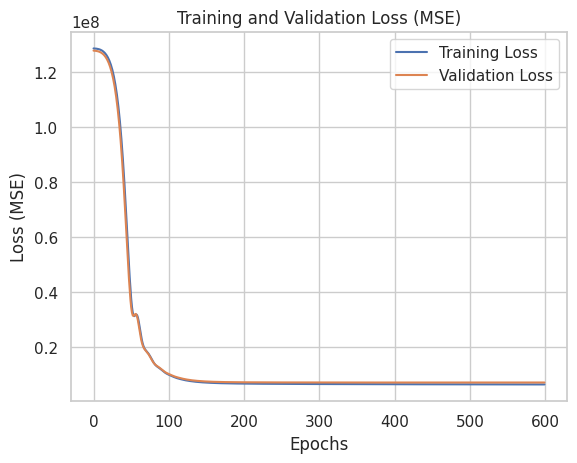

MAE (Mean Absolute Error): 1981.2546


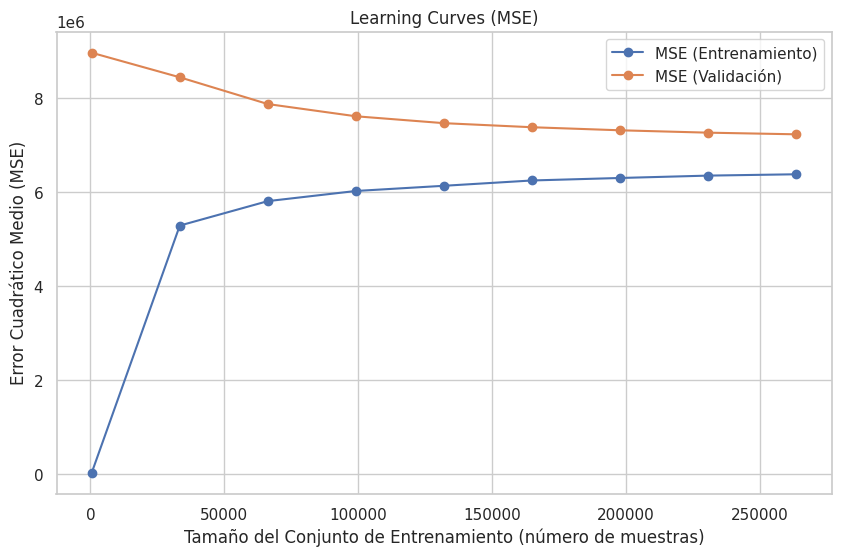

In [ ]:
# Mapea los User_ID y Product_ID a un rango continuo
user_mapping = {user_id: idx for idx, user_id in enumerate(df3['User_ID'].unique())}
product_mapping = {product_id: idx for idx, product_id in enumerate(df3['Product_ID'].unique())}

# Aplica el mapeo a los DataFrames
df3['User_ID_mapped'] = df3['User_ID'].map(user_mapping)
df3['Product_ID_mapped'] = df3['Product_ID'].map(product_mapping)

# Separa caracteristicas y objetivo
X = df3.drop(columns=['Purchase', 'Product_ID', 'User_ID', 'User_ID_mapped', 'Product_ID_mapped'])
y = df3['Purchase']

# Divide en conjuntos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convierte los datos a tensores para usarlos en PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val.values)

# Define el tamano de los embeddings
embedding_size = 10

# Modifica la clase de la Red Neuronal para regresion
class SimpleNN(nn.Module):
    def __init__(self, num_users, num_products, embedding_size):
        super(SimpleNN, self).__init__()
        # Capas de embedding
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.product_embedding = nn.Embedding(num_products, embedding_size)

        # Capas densas
        self.fc1 = nn.Linear(X_train.shape[1] + 20, 128)  # +20 por los embeddings (10 para usuario y 10 para producto), la primera capa oculta en total son 128 neuronas
        self.fc2 = nn.Linear(128, 64) # La segunda capa oculta en total son 64 neuronas
        self.fc3 = nn.Linear(64, 1)  # Salida continua de solo una neurona

    def forward(self, user_ids, product_ids, x):
        user_embeds = self.user_embedding(user_ids)
        product_embeds = self.product_embedding(product_ids)

        x = torch.cat((x, user_embeds, product_embeds), dim=1)  # Concatena caracteristicas y embeddings
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No hay activacion porque se trata de regresion
        return x

# Inicializa el modelo
num_users = len(user_mapping)
num_products = len(product_mapping)
model = SimpleNN(num_users, num_products, embedding_size)

# Hiperparametro de penalizacion: se prueba sin penalizacion
weight_decay=0.00

# Usa funcion de perdida a MSELoss para regresion
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)

# Entrenamiento del modelo de regresion
num_epochs = 600
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()

    # Obtiene IDs de usuario y producto
    user_ids = torch.LongTensor(df3.loc[y_train.index, 'User_ID_mapped'].values)
    product_ids = torch.LongTensor(df3.loc[y_train.index, 'Product_ID_mapped'].values)

    # Entrenamiento
    optimizer.zero_grad()
    outputs = model(user_ids, product_ids, X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validacion
    model.eval()
    with torch.no_grad():
        val_user_ids = torch.LongTensor(df3.loc[y_val.index, 'User_ID_mapped'].values)
        val_product_ids = torch.LongTensor(df3.loc[y_val.index, 'Product_ID_mapped'].values)
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Grafica la evolucion de la funcion de perdida
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss (MSE)')
plt.legend()
plt.show()

# Evalua el rendimiento en el conjunto de validacion usando MAE
model.eval()
with torch.no_grad():
    val_outputs = model(val_user_ids, val_product_ids, X_val_tensor).squeeze()
    mae = torch.mean(torch.abs(val_outputs - y_val_tensor))  # MAE (Mean Absolute Error)
    print(f'MAE (Mean Absolute Error): {mae.item():.4f}')

# Cantidad de datos que se utilizaran para los tamanos del conjunto de entrenamiento
train_sizes = [int(x) for x in np.linspace(500, len(X_train) - 1, 9)]

train_losses = []
val_losses = []

# Calcula la perdida (MSE) para diferentes tamanos del conjunto de entrenamiento
for size in train_sizes:
    # Divide el conjunto de datos con el tamano especificado
    X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=size, random_state=42)

    # Convierte los datos a tensores
    X_train_tensor = torch.FloatTensor(scaler.transform(X_train_subset))
    y_train_tensor = torch.FloatTensor(y_train_subset.values)

    # Obtiene los IDs de usuario y producto
    user_ids = torch.LongTensor(df3.loc[y_train_subset.index, 'User_ID_mapped'].values)
    product_ids = torch.LongTensor(df3.loc[y_train_subset.index, 'Product_ID_mapped'].values)

    # Entrena el modelo
    model.train()
    for epoch in range(50):
        optimizer.zero_grad()
        outputs = model(user_ids, product_ids, X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evalua el modelo en el conjunto de entrenamiento
    model.eval()
    with torch.no_grad():
        train_outputs = model(user_ids, product_ids, X_train_tensor).squeeze()
        train_loss = criterion(train_outputs, y_train_tensor).item()
        train_losses.append(train_loss)

        # Evalua el modelo en el conjunto de validacion
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor).item()
        val_losses.append(val_loss)

# Grafica de las Learning Curves (MSE)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_losses, label='MSE (Entrenamiento)', marker='o')
plt.plot(train_sizes, val_losses, label='MSE (Validación)', marker='o')
plt.title('Learning Curves (MSE)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento (número de muestras)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.legend()
plt.show()

### f) Para el mejor modelo obtenido en el apartado e) elegir al menos 2 hiperparametros para tunear.

Se propone una búsqueda de hiperparámetros manual a traves de bucles y se compara los resultados de las cuatro corridas.

**************************************************
Learning rate: 0.01
Weight decay: 0.01
**************************************************
Epoch [10/600], Loss: 128117416.0000, Val Loss: 127236248.0000
Epoch [20/600], Loss: 125822960.0000, Val Loss: 124610512.0000
Epoch [30/600], Loss: 118005688.0000, Val Loss: 115928024.0000
Epoch [40/600], Loss: 97501272.0000, Val Loss: 93749312.0000
Epoch [50/600], Loss: 58451168.0000, Val Loss: 53480304.0000
Epoch [60/600], Loss: 28236334.0000, Val Loss: 27999622.0000
Epoch [70/600], Loss: 22487078.0000, Val Loss: 21574436.0000
Epoch [80/600], Loss: 16747231.0000, Val Loss: 16596275.0000
Epoch [90/600], Loss: 13395822.0000, Val Loss: 13353776.0000
Epoch [100/600], Loss: 11379178.0000, Val Loss: 11491777.0000
Epoch [110/600], Loss: 9803432.0000, Val Loss: 9985409.0000
Epoch [120/600], Loss: 8789265.0000, Val Loss: 9021917.0000
Epoch [130/600], Loss: 8136023.0000, Val Loss: 8412436.0000
Epoch [140/600], Loss: 7718293.0000, Val Loss: 8020736.5000
Ep

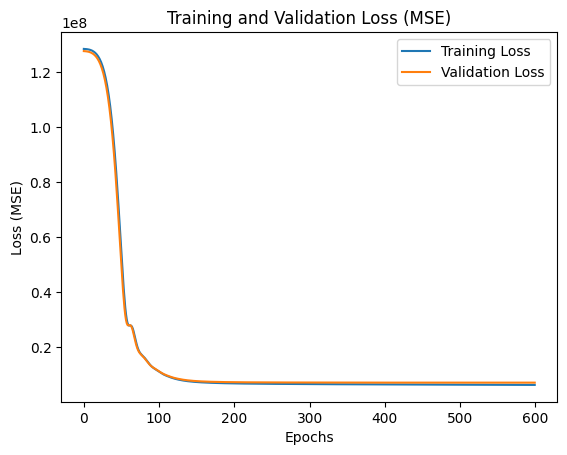

MAE (Mean Absolute Error): 1989.1370


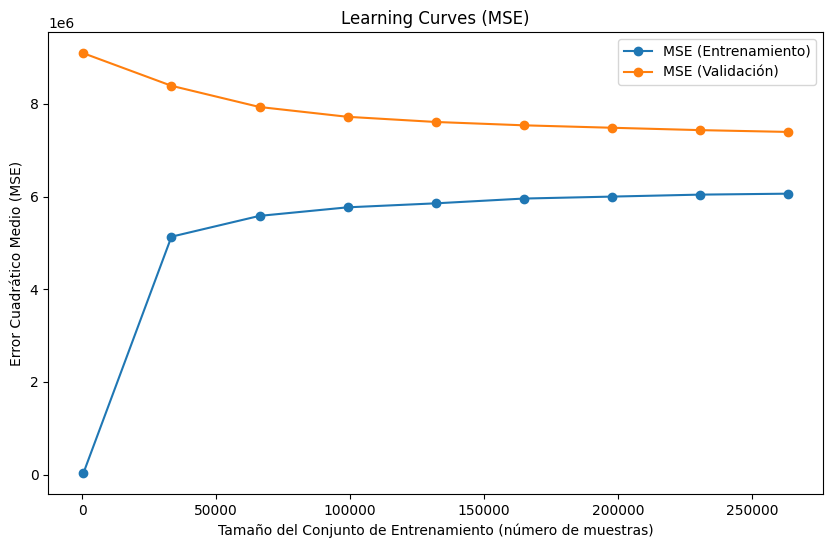

**************************************************
Learning rate: 0.01
Weight decay: 0.001
**************************************************
Epoch [10/600], Loss: 128108456.0000, Val Loss: 127222264.0000
Epoch [20/600], Loss: 125631696.0000, Val Loss: 124389176.0000
Epoch [30/600], Loss: 117077456.0000, Val Loss: 114923344.0000
Epoch [40/600], Loss: 94505528.0000, Val Loss: 90615856.0000
Epoch [50/600], Loss: 52771664.0000, Val Loss: 48217040.0000
Epoch [60/600], Loss: 30032196.0000, Val Loss: 30385114.0000
Epoch [70/600], Loss: 22697414.0000, Val Loss: 22119118.0000
Epoch [80/600], Loss: 18414136.0000, Val Loss: 18327146.0000
Epoch [90/600], Loss: 14916392.0000, Val Loss: 15028350.0000
Epoch [100/600], Loss: 12827861.0000, Val Loss: 12997701.0000
Epoch [110/600], Loss: 11047178.0000, Val Loss: 11283029.0000
Epoch [120/600], Loss: 9702884.0000, Val Loss: 9992535.0000
Epoch [130/600], Loss: 8744309.0000, Val Loss: 9072473.0000
Epoch [140/600], Loss: 8078862.5000, Val Loss: 8435537.0000

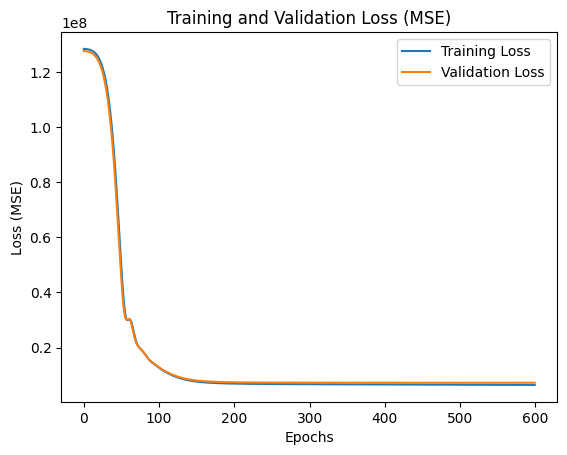

MAE (Mean Absolute Error): 1985.5648


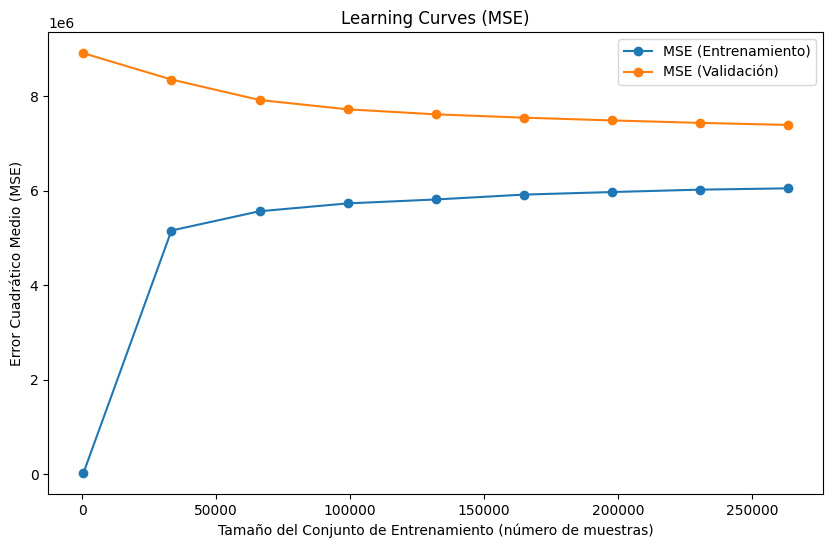

**************************************************
Learning rate: 0.001
Weight decay: 0.01
**************************************************
Epoch [10/600], Loss: 128496848.0000, Val Loss: 127718800.0000
Epoch [20/600], Loss: 128467880.0000, Val Loss: 127688544.0000
Epoch [30/600], Loss: 128422096.0000, Val Loss: 127640824.0000
Epoch [40/600], Loss: 128351104.0000, Val Loss: 127566984.0000
Epoch [50/600], Loss: 128243952.0000, Val Loss: 127455920.0000
Epoch [60/600], Loss: 128087336.0000, Val Loss: 127294048.0000
Epoch [70/600], Loss: 127865288.0000, Val Loss: 127065264.0000
Epoch [80/600], Loss: 127559192.0000, Val Loss: 126750736.0000
Epoch [90/600], Loss: 127147288.0000, Val Loss: 126328424.0000
Epoch [100/600], Loss: 126604000.0000, Val Loss: 125772408.0000
Epoch [110/600], Loss: 125898704.0000, Val Loss: 125051616.0000
Epoch [120/600], Loss: 124993328.0000, Val Loss: 124127160.0000
Epoch [130/600], Loss: 123841328.0000, Val Loss: 122952008.0000
Epoch [140/600], Loss: 122389296.00

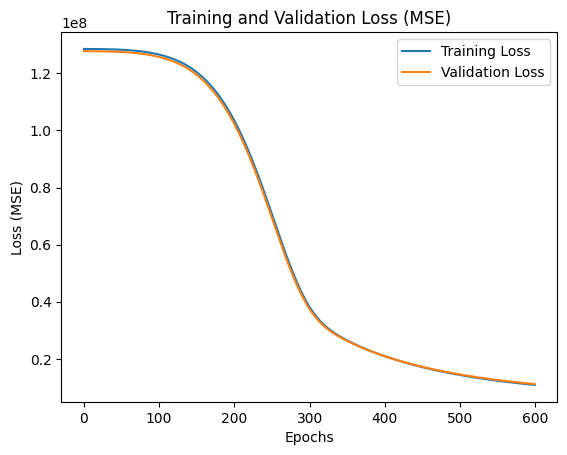

MAE (Mean Absolute Error): 2498.4580


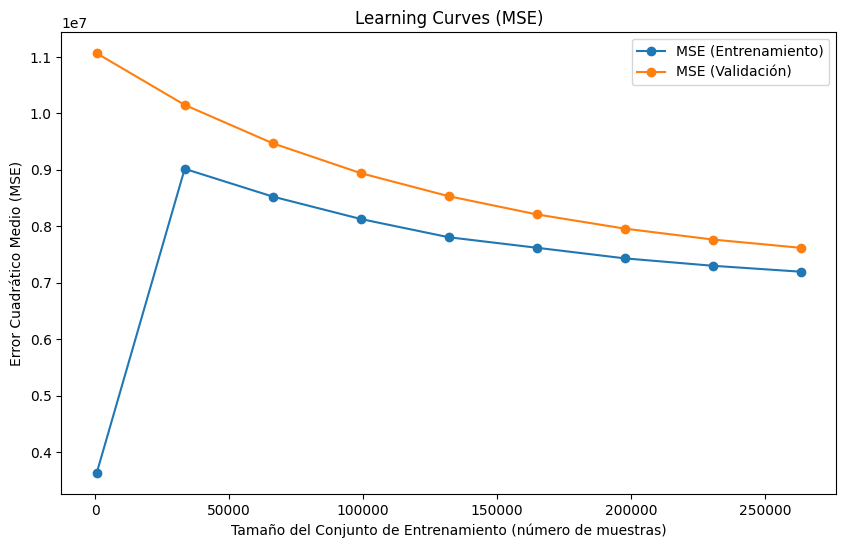

**************************************************
Learning rate: 0.001
Weight decay: 0.001
**************************************************
Epoch [10/600], Loss: 128500936.0000, Val Loss: 127722992.0000
Epoch [20/600], Loss: 128473000.0000, Val Loss: 127693784.0000
Epoch [30/600], Loss: 128428760.0000, Val Loss: 127647680.0000
Epoch [40/600], Loss: 128360672.0000, Val Loss: 127576904.0000
Epoch [50/600], Loss: 128258536.0000, Val Loss: 127471016.0000
Epoch [60/600], Loss: 128109088.0000, Val Loss: 127316456.0000
Epoch [70/600], Loss: 127896800.0000, Val Loss: 127097616.0000
Epoch [80/600], Loss: 127604152.0000, Val Loss: 126796768.0000
Epoch [90/600], Loss: 127211136.0000, Val Loss: 126393704.0000
Epoch [100/600], Loss: 126694864.0000, Val Loss: 125865296.0000
Epoch [110/600], Loss: 126029080.0000, Val Loss: 125184960.0000
Epoch [120/600], Loss: 125183440.0000, Val Loss: 124321992.0000
Epoch [130/600], Loss: 124123152.0000, Val Loss: 123241160.0000
Epoch [140/600], Loss: 122808328.0

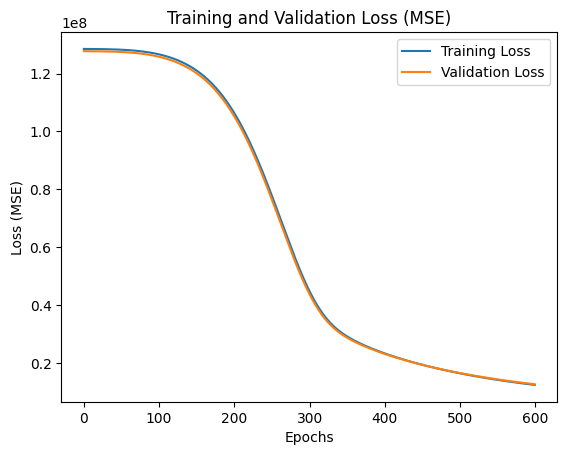

MAE (Mean Absolute Error): 2650.8103


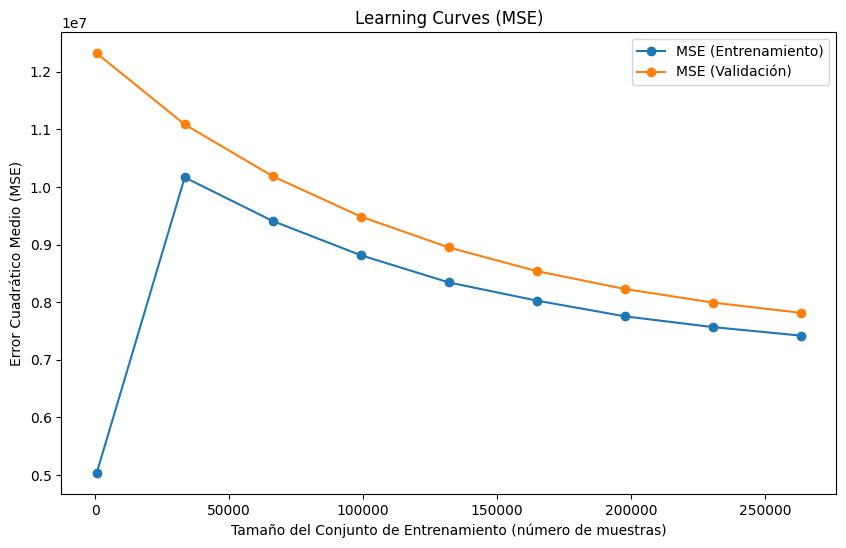

In [ ]:
# Hiperparametros a evaluar
lrs = [0.01, 0.001]
weights_decay = [0.01, 0.001]


# Corre el mismo script que en 'e)', pero variando los 2 hiperparametros
for lr in lrs:
  for weight_decay in weights_decay:

    print('*'*50)
    print(f'Learning rate: {lr}')
    print(f'Weight decay: {weight_decay}')
    print('*'*50)

    # Mapea los User_ID y Product_ID a un rango continuo
    user_mapping = {user_id: idx for idx, user_id in enumerate(df3['User_ID'].unique())}
    product_mapping = {product_id: idx for idx, product_id in enumerate(df3['Product_ID'].unique())}

    # Aplica el mapeo a los DataFrames
    df3['User_ID_mapped'] = df3['User_ID'].map(user_mapping)
    df3['Product_ID_mapped'] = df3['Product_ID'].map(product_mapping)

    # Separa caracteristicas y objetivo
    X = df3.drop(columns=['Purchase', 'Product_ID', 'User_ID', 'User_ID_mapped', 'Product_ID_mapped'])
    y = df3['Purchase']

    # Divide en conjuntos de entrenamiento y validacion
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    # Escalado
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Convierte los datos a tensores para usarlos en PyTorch
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.FloatTensor(y_val.values)

    # Define el tamano de los embeddings
    embedding_size = 10

    # Modifica la clase de la Red Neuronal para regresion
    class SimpleNN(nn.Module):
        def __init__(self, num_users, num_products, embedding_size):
            super(SimpleNN, self).__init__()
            # Capas de embedding
            self.user_embedding = nn.Embedding(num_users, embedding_size)
            self.product_embedding = nn.Embedding(num_products, embedding_size)

            # Capas densas
            self.fc1 = nn.Linear(X_train.shape[1] + 20, 128)  # +20 por los embeddings (10 para usuario y 10 para producto), la primera capa oculta en total son 128 neuronas
            self.fc2 = nn.Linear(128, 64) # La segunda capa oculta en total son 64 neuronas
            self.fc3 = nn.Linear(64, 1)  # Salida continua de solo una neurona

        def forward(self, user_ids, product_ids, x):
            user_embeds = self.user_embedding(user_ids)
            product_embeds = self.product_embedding(product_ids)

            x = torch.cat((x, user_embeds, product_embeds), dim=1)  # Concatena caracteristicas y embeddings
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)  # No hay activacion porque se trata de regresion
            return x

    # Inicializa el modelo
    num_users = len(user_mapping)
    num_products = len(product_mapping)
    model = SimpleNN(num_users, num_products, embedding_size)

    # Usa funcion de perdida a MSELoss para regresion
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=weight_decay)

    # Entrenamiento del modelo de regresion
    num_epochs = 600
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()

        # Obtiene IDs de usuario y producto
        user_ids = torch.LongTensor(df3.loc[y_train.index, 'User_ID_mapped'].values)
        product_ids = torch.LongTensor(df3.loc[y_train.index, 'Product_ID_mapped'].values)

        # Entrenamiento
        optimizer.zero_grad()
        outputs = model(user_ids, product_ids, X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validacion
        model.eval()
        with torch.no_grad():
            val_user_ids = torch.LongTensor(df3.loc[y_val.index, 'User_ID_mapped'].values)
            val_product_ids = torch.LongTensor(df3.loc[y_val.index, 'Product_ID_mapped'].values)
            val_outputs = model(val_user_ids, val_product_ids, X_val_tensor).squeeze()
            val_loss = criterion(val_outputs, y_val_tensor)
            val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # Grafica la evolucion de la funcion de perdida
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss (MSE)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Evalua el rendimiento en el conjunto de validacion usando MAE
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_user_ids, val_product_ids, X_val_tensor).squeeze()
        mae = torch.mean(torch.abs(val_outputs - y_val_tensor))  # MAE (Mean Absolute Error)
        print(f'MAE (Mean Absolute Error): {mae.item():.4f}')

    # Cantidad de datos que se utilizaran para los tamanos del conjunto de entrenamiento
    train_sizes = [int(x) for x in np.linspace(500, len(X_train) - 1, 9)]

    train_losses = []
    val_losses = []

    # Calcula la perdida (MSE) para diferentes tamanos del conjunto de entrenamiento
    for size in train_sizes:
        # Divide el conjunto de datos con el tamano especificado
        X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=size, random_state=42)

        # Convierte los datos a tensores
        X_train_tensor = torch.FloatTensor(scaler.transform(X_train_subset))
        y_train_tensor = torch.FloatTensor(y_train_subset.values)

        # Obtiene los IDs de usuario y producto
        user_ids = torch.LongTensor(df3.loc[y_train_subset.index, 'User_ID_mapped'].values)
        product_ids = torch.LongTensor(df3.loc[y_train_subset.index, 'Product_ID_mapped'].values)

        # Entrena el modelo
        model.train()
        for epoch in range(50):
            optimizer.zero_grad()
            outputs = model(user_ids, product_ids, X_train_tensor).squeeze()
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

        # Evalua el modelo en el conjunto de entrenamiento
        model.eval()
        with torch.no_grad():
            train_outputs = model(user_ids, product_ids, X_train_tensor).squeeze()
            train_loss = criterion(train_outputs, y_train_tensor).item()
            train_losses.append(train_loss)

            # Evalua el modelo en el conjunto de validacion
            val_outputs = model(val_user_ids, val_product_ids, X_val_tensor).squeeze()
            val_loss = criterion(val_outputs, y_val_tensor).item()
            val_losses.append(val_loss)

    # Grafica de las Learning Curves (MSE)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_losses, label='MSE (Entrenamiento)', marker='o')
    plt.plot(train_sizes, val_losses, label='MSE (Validación)', marker='o')
    plt.title('Learning Curves (MSE)')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento (número de muestras)')
    plt.ylabel('Error Cuadrático Medio (MSE)')
    plt.grid(True)
    plt.legend()
    plt.show()

Observaciones:

En la siguiente tabla se resumen los resultados.

| lr  | wd  | MAE  |Observaciones  |
|---- |---- |------|---------------|
|0.01 |0.00 |1981.3|model inciso e)|
|0.01 |0.01 |1989.1|               |
|0.01 |0.001|1985.6|               |
|0.001|0.01 |2498.5|               |
|0.001|0.001|2650.8|               |

A partir de lo anterior se observa que el caso propuesto en el inciso *e)* con un lr = 0.01 y un wr = 0.00 constituye un modelo, en términos de MAE, con respecto a los cuatro propuestos.

No obstante, si se considera la evolución del MSE como métrica, como se muestra en las gráficas de *train* y *test* vs *train size*, se apreció que en los dos últimos modelos esta métrica desciende tanto en la curva de *train* como de *test*. Además, se observó que en ningún caso se alcanza el sobreajuste dado que en las gráficas de pérdida no se ve un valor de época a partir del cual se de un incremento de la pérdida de *train*.

Adicionando, en ninguna de las curvas de *train* y *test* vs *train size* (ni del inciso *e)* ni de los cuatro propuesto aquí) se llegó a ver que las curvas se solapen (lo cual es de esperar en un escenario de sobreajuste).

# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



In [ ]:
# Importa las librerias necesarias
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import time
import numpy as np

In [ ]:
# Descarga el conjunto de entrenamiento
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Descarga el conjunto de prueba
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)


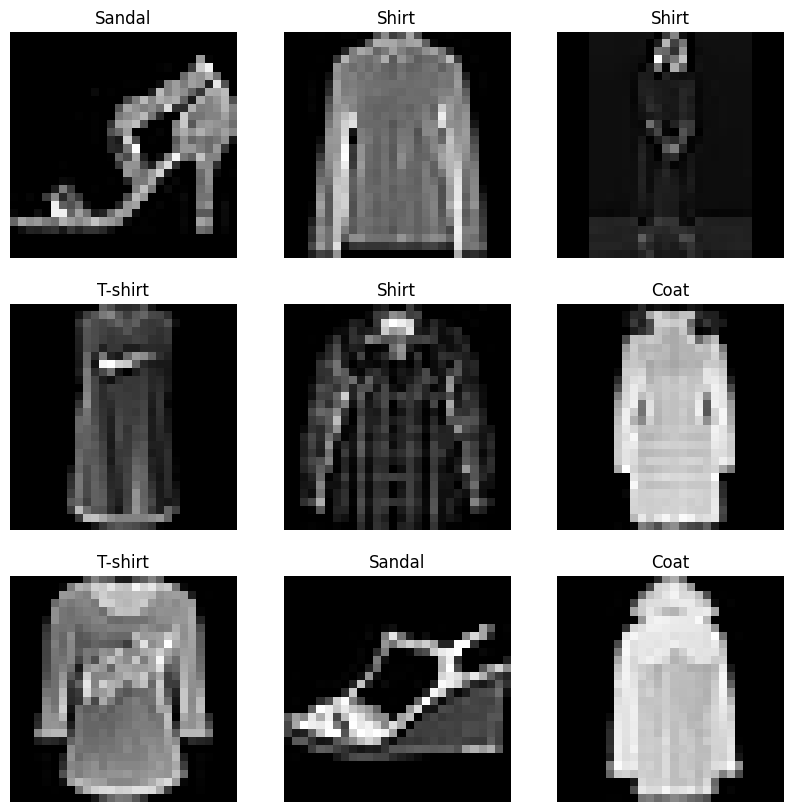

In [ ]:
# Describe las clases a partir de los datos
labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

Training Model 1
Epoch 1/10 | Train Loss: 0.5337 | Train Accuracy: 0.8060 | Test Loss: 0.3605 | Test Accuracy: 0.8697
Epoch 2/10 | Train Loss: 0.3496 | Train Accuracy: 0.8747 | Test Loss: 0.3179 | Test Accuracy: 0.8807
Epoch 3/10 | Train Loss: 0.3123 | Train Accuracy: 0.8874 | Test Loss: 0.3005 | Test Accuracy: 0.8897
Epoch 4/10 | Train Loss: 0.2927 | Train Accuracy: 0.8930 | Test Loss: 0.2925 | Test Accuracy: 0.8934
Epoch 5/10 | Train Loss: 0.2756 | Train Accuracy: 0.9006 | Test Loss: 0.2786 | Test Accuracy: 0.8976
Epoch 6/10 | Train Loss: 0.2679 | Train Accuracy: 0.9022 | Test Loss: 0.2681 | Test Accuracy: 0.9017
Epoch 7/10 | Train Loss: 0.2576 | Train Accuracy: 0.9070 | Test Loss: 0.2805 | Test Accuracy: 0.8973
Epoch 8/10 | Train Loss: 0.2490 | Train Accuracy: 0.9096 | Test Loss: 0.2604 | Test Accuracy: 0.9064
Epoch 9/10 | Train Loss: 0.2434 | Train Accuracy: 0.9119 | Test Loss: 0.2540 | Test Accuracy: 0.9082
Epoch 10/10 | Train Loss: 0.2347 | Train Accuracy: 0.9155 | Test Loss: 0.2

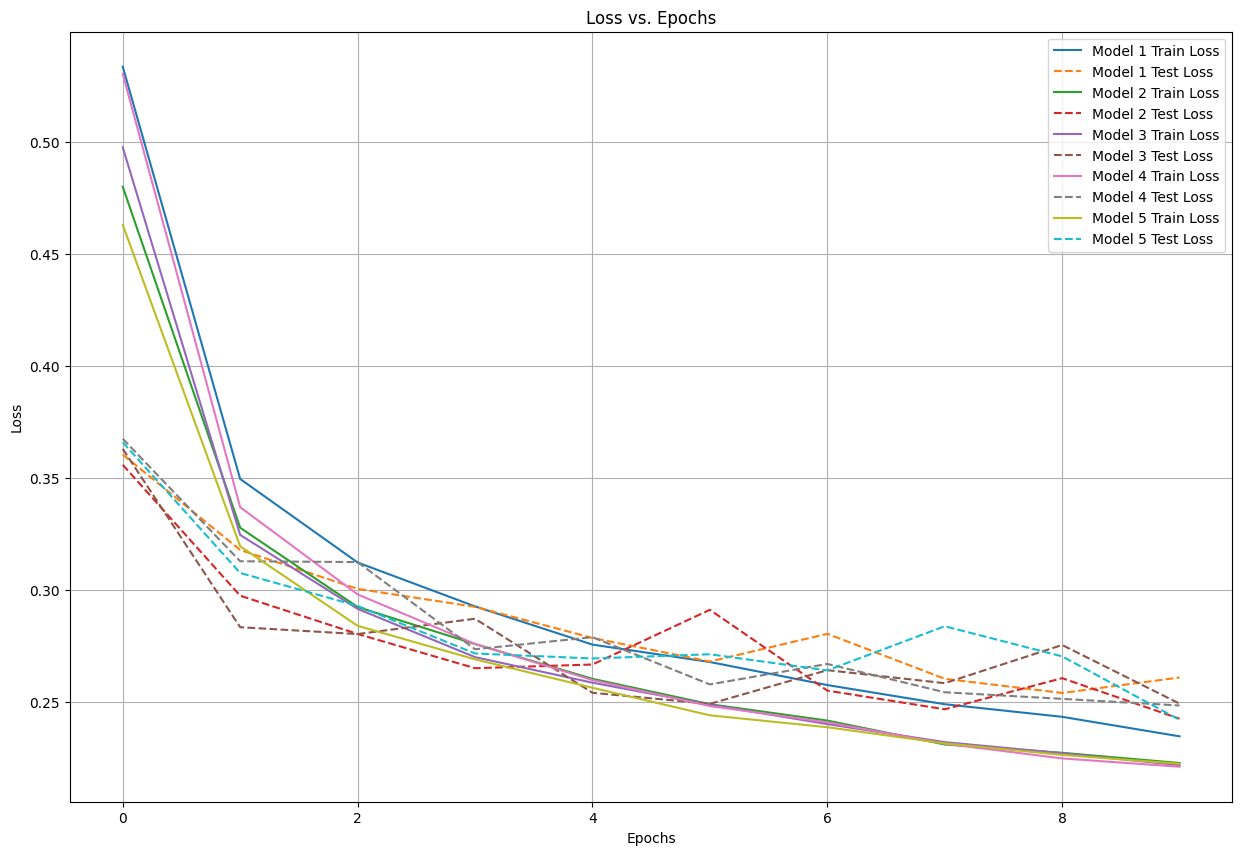

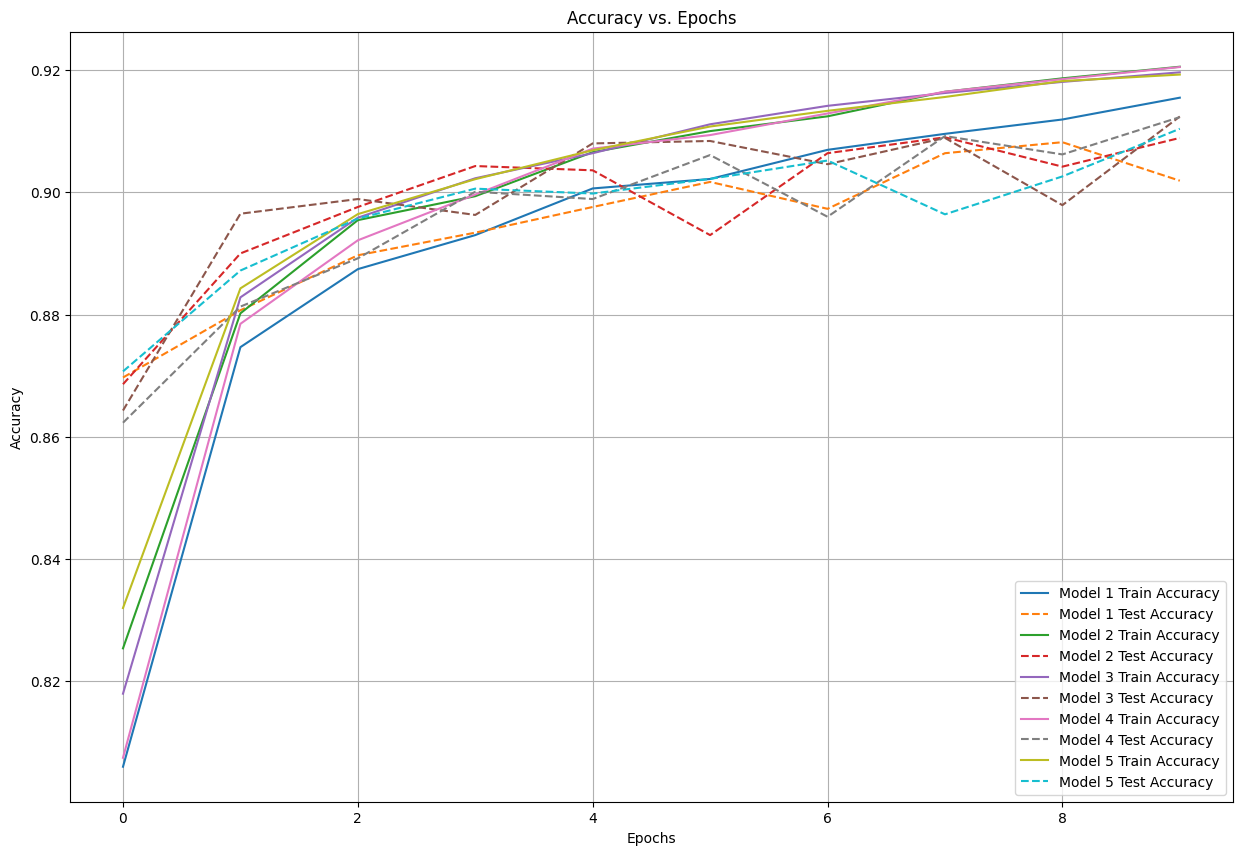

In [ ]:
# Define transformaciones para normalizar el dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Carga datos de entrenamiento y prueba
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

# Crea dataloaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define arquitectura 1 de CNN
class FashionMNISTCNN_v1(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN_v1, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # 1ª capa
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 2ª capa
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define arquitectura 2 de CNN
class FashionMNISTCNN_v2(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN_v2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)  # 1ª capa
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 2ª capa
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define arquitectura 3 de CNN
class FashionMNISTCNN_v3(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN_v3, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # 1ª capa
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 2ª capa
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # 3ª capa
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 256 * 3 * 3)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define arquitectura 4 de CNN
class FashionMNISTCNN_v4(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN_v4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 1ª capa
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 2ª capa
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 3ª capa
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define arquitectura 5 de CNN
class FashionMNISTCNN_v5(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN_v5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=7, padding=3)  # 1ª capa
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)  # 2ª capa
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Lista de modelos
models = [FashionMNISTCNN_v1(), FashionMNISTCNN_v2(), FashionMNISTCNN_v3(),
          FashionMNISTCNN_v4(), FashionMNISTCNN_v5()]

# Verifica si se puede usar la GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define la funcion de perdida y el optimizador
criterion = nn.CrossEntropyLoss()
weight_decay = 0.001  # regularizacion L2

# Funcion de entrenamiento
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    return epoch_loss, epoch_accuracy

# Funcion de evaluacion
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_accuracy = correct / total
    return epoch_loss, epoch_accuracy

# Variables para almacenar resultados
all_train_losses = []
all_test_losses = []
all_train_accuracies = []
all_test_accuracies = []
model_sizes = []
num_parameters = []

# Entrenar y evaluar cada modelo
for i, model in enumerate(models):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

    print(f'Training Model {i + 1}')
    start_time = time.time()
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(10):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch + 1}/{10} | '
              f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | '
              f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}')

    end_time = time.time()
    print(f'Model {i + 1} Training Time: {end_time - start_time:.2f} seconds')

    # Almacena los resultados
    all_train_losses.append(train_losses)
    all_test_losses.append(test_losses)
    all_train_accuracies.append(train_accuracies)
    all_test_accuracies.append(test_accuracies)

    # Calcula tamaño del modelo
    model_size = sum(p.numel() for p in model.parameters()) * 4
    model_sizes.append(model_size / (1024 ** 2))

    # Calcula cantidad de parametros
    num_params = sum(p.numel() for p in model.parameters())
    num_parameters.append(num_params)

# Muestra tamaños de los modelos y cantidad de parametros
for i, (size, params) in enumerate(zip(model_sizes, num_parameters)):
    print(f'Model {i + 1} Size: {size:.2f} MB, Number of Parameters: {params}')

# Grafica funcion de perdida vs epochs para cada modelo
plt.figure(figsize=(15, 10))
for i, (train_loss, test_loss) in enumerate(zip(all_train_losses, all_test_losses)):
    plt.plot(train_loss, label=f'Model {i + 1} Train Loss')
    plt.plot(test_loss, label=f'Model {i + 1} Test Loss', linestyle='dashed')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# Grafica precision vs epochs para cada modelo
plt.figure(figsize=(15, 10))
for i, (train_acc, test_acc) in enumerate(zip(all_train_accuracies, all_test_accuracies)):
    plt.plot(train_acc, label=f'Model {i + 1} Train Accuracy')
    plt.plot(test_acc, label=f'Model {i + 1} Test Accuracy', linestyle='dashed')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()


Observaciones:

En primer lugar, se describe la diferencia entre las 5 arquitecturas propuestas en la siguiente tabla:

|model|nº kernels Capa 1|size Kernels Capa 1|padding Capa 1|nº Kernels Capa 2|size Kernels Capa 2|padding Capa 2|nº Kernels Capa 3|size Kernels Capa 3|paddding Capa 3|
|-----|-------|--------|------|-------|--------|------|-------|--------|------|
|v1   |16     |3x3     |1     |32     |3x3     |1     |-      |-       |-     |
|v2   |32     |5x5     |2     |64     |3x3     |1     |-      |-       |-     |
|v3   |64     |3x3     |1     |128    |3x3     |1     |256    |3x3     |1     |
|v4   |32     |3x3     |1     |64     |3x3     |1     |128    |3x3     |1     |
|v5   |32     |7x7     |3     |64     |5x5     |2     |-      |-       |-     |

Se propusieron diferentes combinaciones de cantidad y tamaño de filtros, número de capas y padding.

Además, se presenta en la siguiente tabla los pesos, cantidad de parámetros y tiempos de ejecución de los diferentes modelos usados.

|modelo|tiempo (s)|peso (MB)|nº parámetros|
|------|----------|---------|-------------|
|v1    |165.19    |0.79     |206922       |
|v2    |164.78    |1.61     |422154       |
|v3    |170.18    |2.54     |665994       |
|v4    |170.30    |0.92     |241546       |
|v5    |168.30    |1.74     |455690       |

Se pudo ver que el modelo con mayor cantidad de parámetros a entrenar (v3) resulta el más pesado, mientras que el más liviano es el que presentó menos pesos sinápticos. En cuanto a los tiempos, todos resolvieron en tiempos similares con apenas 5 segundos de diferencia entre el más lento y el más rápido.

Además, a partir de la evolución de la función de pérdida, solo en el modelo v1 se observó un ligero aumento de la misma en la última época lo que puede sugerir un principio de sobreajuste.

Luego, todos los modelos alcanzan un valor de *accuracy* para el conjunto de prueba entre 0.90 y 0.91 lo cual es muy bueno.

Con estas consideraciones se decidió utilizar la versión del modelo v4, si bien tiene 3 capas de convolución su menor cantidad de parámetros lo hace menos complejo sin mostrar indicios de sobreajuste.

*NOTA: Los tiempos corresponden al uso de GPU A100.*


# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.


Se entrena el modelo FashionMNISTCNN_v4 utilizando el conjunto de datos 'datasets.FashionMNIST', y se guardan los pesos de las 3 capas convolucionales.

In [ ]:
# Define el modelo FashionMNISTCNN_v4
class FashionMNISTCNN_v4(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN_v4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 clases para Fashion MNIST
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Configuraciones
batch_size = 64
num_epochs = 10
learning_rate = 0.001
weight_decay = 0.001

# Transformaciones para las imagenes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Carga el dataset Fashion MNIST
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Carga los datos
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Inicializa el modelo
model_fashion = FashionMNISTCNN_v4()

# Define la funcion de perdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fashion.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Entrena el modelo FashionMNISTCNN_v4
for epoch in range(num_epochs):
    model_fashion.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_fashion(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calcula accuracy de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Evalua en el conjunto de prueba
    model_fashion.eval()
    test_running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model_fashion(images)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()

            # Calcula accuracy de prueba
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader)
    test_accuracy = correct_test / total_test

    print(f'Epoch [{epoch+1}/{num_epochs}], FashionMNIST - Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Guarda los pesos de las capas convolucionales
torch.save({
    'conv1': model_fashion.conv1.state_dict(),
    'conv2': model_fashion.conv2.state_dict(),
    'conv3': model_fashion.conv3.state_dict()
}, 'pesos.pth')

print("Pesos de las capas convolucionales guardados en 'pesos.pth'.")


Epoch [1/10], FashionMNIST - Train Loss: 0.5227, Test Loss: 0.3688, Test Accuracy: 0.8627
Epoch [2/10], FashionMNIST - Train Loss: 0.3375, Test Loss: 0.3094, Test Accuracy: 0.8850
Epoch [3/10], FashionMNIST - Train Loss: 0.3012, Test Loss: 0.2910, Test Accuracy: 0.8968
Epoch [4/10], FashionMNIST - Train Loss: 0.2787, Test Loss: 0.2811, Test Accuracy: 0.8972
Epoch [5/10], FashionMNIST - Train Loss: 0.2614, Test Loss: 0.2984, Test Accuracy: 0.8876
Epoch [6/10], FashionMNIST - Train Loss: 0.2532, Test Loss: 0.2649, Test Accuracy: 0.9031
Epoch [7/10], FashionMNIST - Train Loss: 0.2441, Test Loss: 0.2721, Test Accuracy: 0.9006
Epoch [8/10], FashionMNIST - Train Loss: 0.2339, Test Loss: 0.2591, Test Accuracy: 0.9044
Epoch [9/10], FashionMNIST - Train Loss: 0.2258, Test Loss: 0.2497, Test Accuracy: 0.9118
Epoch [10/10], FashionMNIST - Train Loss: 0.2231, Test Loss: 0.2479, Test Accuracy: 0.9129
Pesos de las capas convolucionales guardados en 'pesos.pth'.


Lo siguiente, es entrenar el modelo MNISTCNN_v4 utilizando Transfer Learning a través de los pesos guardados. Luego se realiza la evaluación.

In [ ]:
# Define el modelo MNISTCNN_v4
class MNISTCNN_v4(nn.Module):
    def __init__(self):
        super(MNISTCNN_v4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 clases para clasificacion binaria
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Configuracion inicial
batch_size = 64
num_epochs_mnist = 10
learning_rate = 0.001
weight_decay = 0.001

# Transformaciones para las imagenes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Carga el dataset MNIST
train_dataset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Filtra y equilibrar el conjunto de entrenamiento
train_labels = train_dataset_mnist.targets.numpy()
filtered_indices = np.where((train_labels < 5) | (train_labels > 4))[0]  # Clases < 5 (0-4), Clases > 4 (5-9)
np.random.shuffle(filtered_indices)
num_samples_per_class = 10000  # 10000 ejemplos para cada clase (20000 en total)
indices_less_than_5 = filtered_indices[train_labels[filtered_indices] < 5][:num_samples_per_class]
indices_greater_than_4 = filtered_indices[train_labels[filtered_indices] > 4][:num_samples_per_class]
selected_indices = np.concatenate([indices_less_than_5, indices_greater_than_4])
np.random.shuffle(selected_indices)

# Crea subconjunto equilibrado de entrenamiento
train_subset = Subset(train_dataset_mnist, selected_indices)
train_loader_mnist = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

# Conjunto de prueba sin cambios
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=batch_size, shuffle=False)

# Inicializa el modelo MNISTCNN_v4
model_mnist = MNISTCNN_v4()

# Carga los pesos preentrenados de FashionMNISTCNN_v4
pretrained_weights = torch.load('pesos.pth')
model_mnist.conv1.load_state_dict(pretrained_weights['conv1'])
model_mnist.conv2.load_state_dict(pretrained_weights['conv2'])
model_mnist.conv3.load_state_dict(pretrained_weights['conv3'])

# Congela las capas convolucionales
for param in model_mnist.conv1.parameters():
    param.requires_grad = False
for param in model_mnist.conv2.parameters():
    param.requires_grad = False
for param in model_mnist.conv3.parameters():
    param.requires_grad = False

# Define la funcion de perdida y el optimizador para entrenar las capas densas
criterion_mnist = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(filter(lambda p: p.requires_grad, model_mnist.parameters()), lr=learning_rate, weight_decay=weight_decay)

# Lista para almacenar las perdidas y accuracies de MNISTCNN_v4
test_losses_mnist_TL = []
test_accuracies_mnist_TL = []

# Entrenamiento de las capas completamente conectadas
for epoch in range(num_epochs_mnist):
    model_mnist.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader_mnist:
        labels = (labels > 4).long()  # Etiquetas: 0 si <5, 1 si >4
        optimizer_mnist.zero_grad()
        outputs = model_mnist(images)
        loss = criterion_mnist(outputs, labels)
        loss.backward()
        optimizer_mnist.step()
        running_loss += loss.item()

        # Calcula accuracy de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader_mnist)
    train_accuracy = correct_train / total_train

    # Evalua en el conjunto de prueba
    model_mnist.eval()
    test_running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader_mnist:
            labels = (labels > 4).long()  # Etiquetas: 0 si <5, 1 si >4
            outputs = model_mnist(images)
            loss = criterion_mnist(outputs, labels)
            test_running_loss += loss.item()

            # Calcula accuracy de prueba
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader_mnist)
    test_accuracy = correct_test / total_test
    test_losses_mnist_TL.append(avg_test_loss)
    test_accuracies_mnist_TL.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs_mnist}], MNISTCNN - Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1628297.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 152316.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 542973.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7515001.49it/s]
<ipython-input-13-e80a5073c963>:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_weights = torch.load('p

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], MNISTCNN - Train Loss: 0.1444, Test Loss: 0.0816, Test Accuracy: 0.9688
Epoch [2/10], MNISTCNN - Train Loss: 0.0680, Test Loss: 0.0682, Test Accuracy: 0.9748
Epoch [3/10], MNISTCNN - Train Loss: 0.0569, Test Loss: 0.0497, Test Accuracy: 0.9804
Epoch [4/10], MNISTCNN - Train Loss: 0.0476, Test Loss: 0.0567, Test Accuracy: 0.9803
Epoch [5/10], MNISTCNN - Train Loss: 0.0430, Test Loss: 0.0448, Test Accuracy: 0.9841
Epoch [6/10], MNISTCNN - Train Loss: 0.0374, Test Loss: 0.0417, Test Accuracy: 0.9859
Epoch [7/10], MNISTCNN - Train Loss: 0.0398, Test Loss: 0.0448, Test Accuracy: 0.9845
Epoch [8/10], MNISTCNN - Train Loss: 0.0352, Test Loss: 0.0400, Test Accuracy: 0.9859
Epoch [9/10], MNISTCNN - Train Loss: 0.0331, Test Loss: 0.0378, Test Accuracy: 0.9856
Epoch [10/10], MNISTCNN - Train Loss: 0.0324, Test Loss: 0.0445, Test Accuracy: 0.9848


De forma paralela, se entrenan todas las capas del modelo MNISTCNN_v4 desde cero sin usar Transfer Learning.

In [ ]:
# Define nuevamente el modelo MNISTCNN_v4 para mantener independencia de scripts
class MNISTCNN_v4(nn.Module):
    def __init__(self):
        super(MNISTCNN_v4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 clases para clasificacion binaria
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)  # Aplanar
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Configuracion inicial
batch_size = 64
num_epochs_mnist = 10
learning_rate = 0.001
weight_decay = 0.001

# Transformaciones para las imagenes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Carga el dataset MNIST
train_dataset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Filtra y equilibrar el conjunto de entrenamiento
train_labels = train_dataset_mnist.targets.numpy()
filtered_indices = np.where((train_labels < 5) | (train_labels > 4))[0]  # Clases < 5 (0-4), Clases > 4 (5-9)
np.random.shuffle(filtered_indices)
num_samples_per_class = 10000  # 10000 ejemplos para cada clase (20000 en total)
indices_less_than_5 = filtered_indices[train_labels[filtered_indices] < 5][:num_samples_per_class]
indices_greater_than_4 = filtered_indices[train_labels[filtered_indices] > 4][:num_samples_per_class]
selected_indices = np.concatenate([indices_less_than_5, indices_greater_than_4])
np.random.shuffle(selected_indices)

# Crea subconjunto equilibrado de entrenamiento
train_subset = Subset(train_dataset_mnist, selected_indices)
train_loader_mnist = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

# Conjunto de prueba sin cambios
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=batch_size, shuffle=False)

# Inicializa el modelo MNISTCNN_v4
model_mnist = MNISTCNN_v4()

# Define la funcion de perdida y el optimizador
criterion_mnist = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(model_mnist.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Listas para almacenar las perdidas y accuracies de MNISTCNN_v4
test_losses_mnist = []
test_accuracies_mnist = []

# Entrenamiento
for epoch in range(num_epochs_mnist):
    model_mnist.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader_mnist:
        labels = (labels > 4).long()  # Etiquetas: 0 si <5, 1 si >4
        optimizer_mnist.zero_grad()
        outputs = model_mnist(images)
        loss = criterion_mnist(outputs, labels)
        loss.backward()
        optimizer_mnist.step()
        running_loss += loss.item()

        # Calcula accuracy de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader_mnist)
    train_accuracy = correct_train / total_train

    # Evalua en el conjunto de prueba
    model_mnist.eval()
    test_running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader_mnist:
            labels = (labels > 4).long()  # Etiquetas: 0 si <5, 1 si >4
            outputs = model_mnist(images)
            loss = criterion_mnist(outputs, labels)
            test_running_loss += loss.item()

            # Calcula accuracy de prueba
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader_mnist)
    test_accuracy = correct_test / total_test
    test_losses_mnist.append(avg_test_loss)
    test_accuracies_mnist.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs_mnist}], MNISTCNN - Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch [1/10], MNISTCNN - Train Loss: 0.1885, Test Loss: 0.0692, Test Accuracy: 0.9737
Epoch [2/10], MNISTCNN - Train Loss: 0.0629, Test Loss: 0.0613, Test Accuracy: 0.9794
Epoch [3/10], MNISTCNN - Train Loss: 0.0495, Test Loss: 0.0471, Test Accuracy: 0.9828
Epoch [4/10], MNISTCNN - Train Loss: 0.0376, Test Loss: 0.0456, Test Accuracy: 0.9834
Epoch [5/10], MNISTCNN - Train Loss: 0.0331, Test Loss: 0.0625, Test Accuracy: 0.9806
Epoch [6/10], MNISTCNN - Train Loss: 0.0277, Test Loss: 0.0668, Test Accuracy: 0.9791
Epoch [7/10], MNISTCNN - Train Loss: 0.0252, Test Loss: 0.0519, Test Accuracy: 0.9815
Epoch [8/10], MNISTCNN - Train Loss: 0.0238, Test Loss: 0.0360, Test Accuracy: 0.9886
Epoch [9/10], MNISTCNN - Train Loss: 0.0251, Test Loss: 0.0317, Test Accuracy: 0.9874
Epoch [10/10], MNISTCNN - Train Loss: 0.0210, Test Loss: 0.0591, Test Accuracy: 0.9814


Se realizan las curvas de interés

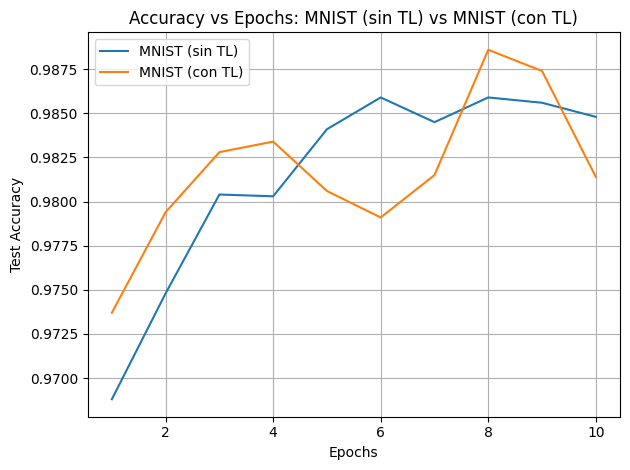

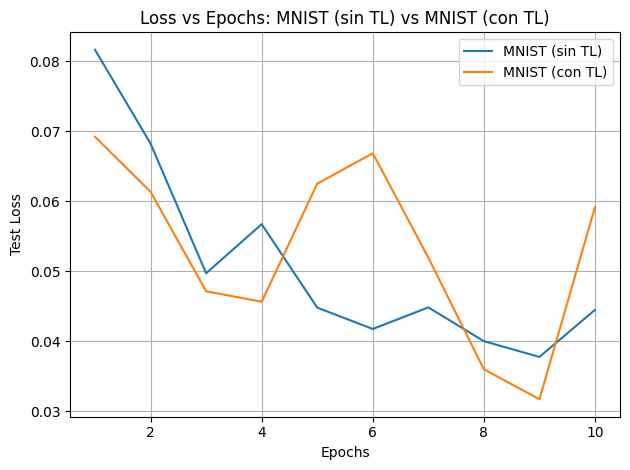

In [ ]:
# Grafica comparativa: Accuracy vs Epochs para ambos modelos (con y sin transfer learning)
plt.figure()
plt.plot(range(1, num_epochs_mnist+1), test_accuracies_mnist_TL, label='MNIST (sin TL)')
plt.plot(range(1, num_epochs_mnist+1), test_accuracies_mnist, label='MNIST (con TL)')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Epochs: MNIST (sin TL) vs MNIST (con TL)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Grafica comparativa: Perdidas vs Epochs para ambos modelos (con y sin transfer learning)
plt.figure()
plt.plot(range(1, num_epochs_mnist+1), test_losses_mnist_TL, label='MNIST (sin TL)')
plt.plot(range(1, num_epochs_mnist+1), test_losses_mnist, label='MNIST (con TL)')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Loss vs Epochs: MNIST (sin TL) vs MNIST (con TL)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Observaciones:

Se decidió utilizar la técnica de "Feature Extractor" dentro de la implementación de "Transfer Learning". Esto se debió a que el tamaño del subset de 20000 muestras es pequeño en términos relativos al conjunto total de 60000 muestras (se uitiliza el 33%). Además, como definir si los tipos de imagenes son similares o no es subjetivo y depende en parte de lo que se busca resolver, se procedió a considerar que son similares y evaluar sus resultados. Luego, como el desempeño es aceptable no se implementó probar considerando que las imagenes de ambos datasets son diferentes.

Por otro lado, se utilizaron los pesos sinápticos (alcanzados por entrenamiento) de la las capas de convolución de la red original elegida, para ser utilizados en las mismas capas de la red definada para la clasificación binaria dado que en términos relativos el tamaño del dataset es *pequeño*.

En la comparación entre los resutados utilizando Transfer Learning y sin utilizar esta técnica, en términos generales la primera dio mejores resultados (menor pérdida y mayor *accuracy*). Cabe destacar que la mejora es pequeña, y que en épocas cercanas a la sexta, séptima y décima esto no ocurre.